# COVID-19 DATA READER ( BROKEN To be updated: To update goto  "Cell->Run All")
## ECDC switched to a weekly reporting schedule for the COVID-19 situation worldwide and in the EU/EEA and the UK on 17 December this year. Hence, all daily updates have been discontinued from 14 December. ECDC will publish updates on the number of cases and deaths reported worldwide and aggregated by week every Thursday. The weekly data will be available as downloadable files in the following formats: XLSX, CSV, JSON and XML. As an exception, the weekly updates for the end-of-year festive season will be published on 23 December and 30 December 2020."

## Scroll down the page in order to see the graphs. 

- Date of the data. The ECDC data is updated around 13h00 and refers to the day before.

"ECDC switched to a weekly reporting schedule for the COVID-19 situation worldwide and in the EU/EEA and the UK on 17 December this year. Hence, all daily updates have been discontinued from 14 December. ECDC will publish updates on the number of cases and deaths reported worldwide and aggregated by week every Thursday. The weekly data will be available as downloadable files in the following formats: XLSX, CSV, JSON and XML. As an exception, the weekly updates for the end-of-year festive season will be published on 23 December and 30 December 2020."

In [1]:
from datetime import date
print(date.today())

2020-12-22


- Required python modules 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style

- MA stands for the time period in days for the averaging. Higher MA results in smoother graphs 
     + MA=1 -> no averaging; MA=14 -> two weaks averaging. 

In [3]:
MA=14 # FOR MOVING AVERAGES
def moving_average(data_set, periods):
    weights = np.ones(periods) / periods
    return np.convolve(data_set, weights, mode='valid')

## ECDC data for cases and deaths and Johns Hopkins for the recovered 

In [4]:
# ECDC open database
urlcsv='https://opendata.ecdc.europa.eu/covid19/casedistribution/csv/data.csv'
# Create a pandas dataframe from the csv database
df = pd.read_csv(urlcsv, encoding = "ISO-8859-1")
# date format
df['dateRep'] = pd.to_datetime(df['dateRep'], format='%d/%m/%Y')
# Get IDS from the listed countries
countries=df['countriesAndTerritories'].unique()
geoIDS=df['geoId'].unique()

### Base de Dados Johns Hopkins Recovered
recov='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
dfr=pd.read_csv(recov)
df

dateRep year_week  cases_weekly  deaths_weekly  \
0    2020-12-14   2020-50          1757             71   
1    2020-12-07   2020-49          1672            137   
2    2020-11-30   2020-48          1073             68   
3    2020-11-23   2020-47          1368             69   
4    2020-11-16   2020-46          1164             61   
...         ...       ...           ...            ...   
8933 2020-04-20   2020-16            11              0   
8934 2020-04-13   2020-15             5              2   
8935 2020-04-06   2020-14             2              0   
8936 2020-03-30   2020-13             5              1   
8937 2020-03-23   2020-12             2              0   

     countriesAndTerritories geoId countryterritoryCode  popData2019  \
0                Afghanistan    AF                  AFG   38041757.0   
1                Afghanistan    AF                  AFG   38041757.0   
2                Afghanistan    AF                  AFG   38041757.0   
3                Afghanistan    AF                  AFG   38041757.0   
4                Afghanistan    AF                  AFG   38041757.0   
...                      ...   ...                  ...          ...   
8933                Zimbabwe    ZW                  ZWE   14645473.0   
8934                Zimbabwe    ZW                  ZWE   14645473.0   
8935                Zimbabwe    ZW                  ZWE   14645473.0   
8936                Zimbabwe    ZW                  ZWE   14645473.0   
8937                Zimbabwe    ZW                  ZWE   14645473.0   

     continentExp  notification_rate_per_100000_population_14-days  
0            Asia                                             9.01  
1            Asia                                             7.22  
2            Asia                                             6.42  
3            Asia                                             6.66  
4            Asia                                             4.65  
...           ...                                              ...  
8933       Africa                                             0.11  
8934       Africa                                             0.05  
8935       Africa                                             0.05  
8936       Africa                                             0.05  
8937       Africa                                              NaN  

[8938 rows x 10 columns]

## Countries selection and data treatment

In [12]:
ptdf = df[df['geoId'] == 'PT']
ptdf=ptdf[::-1]
ptdf

dateRep year_week  cases_weekly  deaths_weekly  \
6637 2020-03-09   2020-10            30              0   
6636 2020-03-16   2020-11           215              0   
6635 2020-03-23   2020-12          1355             14   
6634 2020-03-30   2020-13          4362            105   
6633 2020-04-06   2020-14          5316            176   
6632 2020-04-13   2020-15          5307            209   
6631 2020-04-20   2020-16          3621            210   
6630 2020-04-27   2020-17          3640            214   
6629 2020-05-04   2020-18          1678            135   
6628 2020-05-11   2020-19          2057             72   
6627 2020-05-18   2020-20          1455             83   
6626 2020-05-25   2020-21          1587             98   
6625 2020-06-01   2020-22          1877             94   
6624 2020-06-08   2020-23          1993             69   
6623 2020-06-15   2020-24          2197             38   
6622 2020-06-22   2020-25          2443             13   
6621 2020-06-29   2020-26          2513             34   
6620 2020-07-06   2020-27          2251             50   
6619 2020-07-13   2020-28          2615             46   
6618 2020-07-20   2020-29          2124             29   
6617 2020-07-27   2020-30          1528             28   
6616 2020-08-03   2020-31          1299             21   
6615 2020-08-10   2020-32          1205             18   
6614 2020-08-17   2020-33          1434             22   
6613 2020-08-24   2020-34          1495             18   
6612 2020-08-31   2020-35          2171             23   
6611 2020-09-07   2020-36          2490             21   
6610 2020-09-14   2020-37          3725             27   
6609 2020-09-21   2020-38          4594             45   
6608 2020-09-28   2020-39          5027             41   
6607 2020-10-05   2020-40          4643             42   
6606 2020-10-12   2020-41          8417             85   
6605 2020-10-19   2020-42         13247            101   
6604 2020-10-26   2020-43         18775            135   
6603 2020-11-02   2020-44         25655            228   
6602 2020-11-09   2020-45         34983            352   
6601 2020-11-16   2020-46         37977            485   
6600 2020-11-23   2020-47         43457            516   
6599 2020-11-30   2020-48         34041            530   
6598 2020-12-07   2020-49         27675            536   
6597 2020-12-14   2020-50         26270            596   

     countriesAndTerritories geoId countryterritoryCode  popData2019  \
6637                Portugal    PT                  PRT   10276617.0   
6636                Portugal    PT                  PRT   10276617.0   
6635                Portugal    PT                  PRT   10276617.0   
6634                Portugal    PT                  PRT   10276617.0   
6633                Portugal    PT                  PRT   10276617.0   
6632                Portugal    PT                  PRT   10276617.0   
6631                Portugal    PT                  PRT   10276617.0   
6630                Portugal    PT                  PRT   10276617.0   
6629                Portugal    PT                  PRT   10276617.0   
6628                Portugal    PT                  PRT   10276617.0   
6627                Portugal    PT                  PRT   10276617.0   
6626                Portugal    PT                  PRT   10276617.0   
6625                Portugal    PT                  PRT   10276617.0   
6624                Portugal    PT                  PRT   10276617.0   
6623                Portugal    PT                  PRT   10276617.0   
6622                Portugal    PT                  PRT   10276617.0   
6621                Portugal    PT                  PRT   10276617.0   
6620                Portugal    PT                  PRT   10276617.0   
6619                Portugal    PT                  PRT   10276617.0   
6618                Portugal    PT                  PRT   10276617.0   
6617                Portugal    PT                  PRT   1

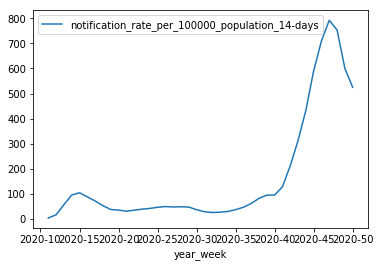

In [13]:
ptdf.plot(x='year_week',y='notification_rate_per_100000_population_14-days')

In [7]:
# #PT
ptdf = df[df['geoId'] == 'PT']
ptdate='2020-03-03'
ptdf = ptdf[ptdf['dateRep'] >= ptdate]
Npt=ptdf.iloc[0,9]/100000 # População por 100 000
ptrec=dfr[dfr['Country/Region']=='Portugal'].iloc[0,4:].loc['3/2/20':]
#print(len(ptrec.values), len(ptdf['deaths'].values),len(ptdf['cases'].values))
#print(ptrec)
#print(ptdf[:5])
# #SPAIN
spdf = df[df['geoId'] == 'ES']
spdate='2020-02-25'
spdf = spdf[spdf['dateRep'] >= spdate]
Nsp = spdf.iloc[0,9]/100000 # População por 100 000
sprec=dfr[dfr['Country/Region']=='Spain'].iloc[0,4:].loc['2/24/20':]
# #Italy
itdf = df[df['geoId'] == 'IT']
itdate='2020-02-22'
itdf = itdf[itdf['dateRep'] >= itdate]
Nit =  itdf.iloc[0,9]/100000 # População por 100 000
itrec=dfr[dfr['Country/Region']=='Italy'].iloc[0,4:].loc['2/21/20':]
# #France
frdf = df[df['geoId'] == 'FR']
frdate='2020-02-26'
frdf = frdf[frdf['dateRep'] >= frdate]
Nfr = frdf.iloc[0,9]/100000 # População por 100 000
frrec=dfr[dfr['Country/Region']=='France'].iloc[0,4:].loc['2/25/20':]
# #Sweden
sedf = df[df['geoId'] == 'SE']
sedate='2020-02-27'
sedf = sedf[sedf['dateRep'] >= sedate]
Nse = sedf.iloc[0,9]/100000 # População por 100 000
serec=dfr[dfr['Country/Region']=='Sweden'].iloc[0,4:].loc['2/26/20':]
# #Switzerland
chdf = df[df['geoId'] == 'CH']
chdate='2020-02-26'
chdf = chdf[chdf['dateRep'] >= chdate]
Nch = chdf.iloc[0,9]/100000 # População por 100 000
chrec=dfr[dfr['Country/Region']=='Switzerland'].iloc[0,4:].loc['2/25/20':]
# #Germany
dedf = df[df['geoId'] == 'DE']
dedate='2020-02-26'
dedf = dedf[dedf['dateRep'] >= dedate]
Nde = dedf.iloc[0,9]/100000 # População por 100 000
derec=dfr[dfr['Country/Region']=='Germany'].iloc[0,4:].loc['2/25/20':]
# #UK
ukdf = df[df['geoId'] == 'UK']
ukdate='2020-02-24'
ukdf = ukdf[ukdf['dateRep'] >= ukdate]
Nuk = ukdf.iloc[0,9]/100000 # População por 100 000
ukrec=dfr[dfr['Country/Region']=='United Kingdom'].iloc[6,4:].loc['2/23/20':]
# #BRAZIL
brdf = df[df['geoId'] == 'BR']
brdate='2020-02-26'
brdf = brdf[brdf['dateRep'] >= brdate]
Nbr = brdf.iloc[0,9]/100000 # População por 100 000
brrec=dfr[dfr['Country/Region']=='Brazil'].iloc[0,4:].loc['2/25/20':]
# #USA
usdf = df[df['geoId'] == 'US']
usdate='2020-02-21'
usdf = usdf[usdf['dateRep'] >= usdate]
Nus = usdf.iloc[0,9]/100000 # População por 100 000
usrec=dfr[dfr['Country/Region']=='US'].iloc[0,4:].loc['2/20/20':]
# #JAPAN
jpdf = df[df['geoId'] == 'JP']
jpdate='2020-02-13'
jpdf = jpdf[jpdf['dateRep'] >= jpdate]
Njp = jpdf.iloc[0,9]/100000 # População por 100 000
jprec=dfr[dfr['Country/Region']=='Japan'].iloc[0,4:].loc['2/12/20':]
# #Netherlands
nldf = df[df['geoId'] == 'NL']
nldate='2020-03-07'
nldf = nldf[nldf['dateRep'] >= nldate]
Nnl = nldf.iloc[0,9]/100000 # População por 100 000
nlrec= dfr[dfr['Country/Region']=='Netherlands'].iloc[0,4:].loc['3/6/20':]# A tratar
# #Belgium
bedf = df[df['geoId'] == 'BE']
bedate='2020-03-02'
bedf = bedf[bedf['dateRep'] >= bedate]
Nbe =  bedf.iloc[0,9]/100000 # População por 100 000
berec= dfr[dfr['Country/Region']=='Belgium'].iloc[0,4:].loc['3/1/20':]# A tratar
# #Russia
rudf = df[df['geoId'] == 'RU']
rudate='2020-03-03'
rudf = rudf[rudf['dateRep'] >= rudate]
Nru =  rudf.iloc[0,9]/100000 # População por 100 000
rurec= dfr[dfr['Country/Region']=='Russia'].iloc[0,4:].loc['3/2/20':]# A tratar
# #Greece
eldf = df[df['geoId'] == 'EL']
eldate='2020-02-27'
eldf = eldf[eldf['dateRep'] >= eldate]
Nel =  eldf.iloc[0,9]/100000 # População por 100 000
elrec= dfr[dfr['Country/Region']=='Greece'].iloc[0,4:].loc['2/26/20':]# A tratar
# #TURKEY
trdf = df[df['geoId'] == 'TR']
trdate='2020-03-12'
trdf = trdf[trdf['dateRep'] >= trdate]
Ntr =  trdf.iloc[0,9]/100000 # População por 100 000
trrec= dfr[dfr['Country/Region']=='Turkey'].iloc[0,4:].loc['3/11/20':]# A tratar
# #Czechia
czdf = df[df['geoId'] == 'CZ']
czdate='2020-03-02'
czdf = czdf[czdf['dateRep'] >= czdate]
Ncz =  czdf.iloc[0,9]/100000 # População por 100 000
czrec= dfr[dfr['Country/Region']=='Czechia'].iloc[0,4:].loc['3/1/20':]# A tratar
# #Hungary
hudf = df[df['geoId'] == 'HU']
hudate='2020-03-05'
hudf = hudf[hudf['dateRep'] >= hudate]
Nhu =  hudf.iloc[0,9]/100000 # População por 100 000
hurec= dfr[dfr['Country/Region']=='Hungary'].iloc[0,4:].loc['3/4/20':]# A tratar
# #AUSTRIA
atdf = df[df['geoId'] == 'AT']
atdate='2020-02-26'
atdf = atdf[atdf['dateRep'] >= atdate]
Nat =  atdf.iloc[0,9]/100000 # População por 100 000
atrec= dfr[dfr['Country/Region']=='Austria'].iloc[0,4:].loc['2/25/20':]# A tratar
# #CHINA
# In[205]:
cndf = df[df['geoId'] == 'CN']
cndate='2020-01-03'
cndf = cndf[cndf['dateRep'] >= cndate]
#Ncn =  cndf.iloc[0,9]/1000000 # aqui isto não presta....
cnrec= dfr[dfr['Country/Region']=='China'].iloc[0,4:].loc['2/1/20':]# A tratar
Ncn=13900 #China x 100 000
NcnW=110  #Wuhan x 100 000 (not used)
NcnHub=590 #Hubey x 100 000 (not used)

- Graph formatting 

In [8]:
from countriesdict import *

NameError: name 'ptdf' is not defined

In [7]:
portugal={'country': 'Portugal', 'color':'b','ls': '-.','markers': '.',
          'cases':ptdf['cases'].values,'deaths':ptdf['deaths'].values,'pop':Npt,
          'recovered':ptrec.values}

spain={'country': 'Spain', 'color':'y','ls': '-','markers': '',
       'cases':spdf['cases'].values,'deaths':spdf['deaths'].values,'pop':Nsp,
       'recovered':sprec.values}

italy={'country': 'Italy', 'color':'g','ls': '-','markers': '',
       'cases':itdf['cases'].values,'deaths':itdf['deaths'].values,'pop':Nit,
       'recovered':itrec.values}

france={'country': 'France', 'color':'r','ls': '-','markers': '',
        'cases':frdf['cases'].values,'deaths':frdf['deaths'].values,'pop':Nfr,
        'recovered':frrec.values}

sweden={'country': 'Sweden', 'color':'c','ls': '-','markers': '',
        'cases':sedf['cases'].values,'deaths':sedf['deaths'].values,'pop':Nse,
        'recovered':serec.values}

switzerland={'country': 'Switzerland', 'color':'brown','ls': '-','markers': '+',
             'cases':chdf['cases'].values,'deaths':chdf['deaths'].values,'pop':Nch,
             'recovered':chrec.values}

germany={'country': 'Germany', 'color':'purple','ls': '-','markers': '',
         'cases':dedf['cases'].values,'deaths':dedf['deaths'].values,'pop':Nde,
         'recovered':derec.values}

united_kingdom={'country': 'United_Kingdom', 'color':'coral','ls': '-','markers': '',
                'cases':ukdf['cases'].values,'deaths':ukdf['deaths'].values,'pop':Nuk,
                'recovered':ukrec.values}

brazil={'country': 'Brazil', 'color':'silver','ls': '-','markers': '',
        'cases':brdf['cases'].values,'deaths':brdf['deaths'].values,'pop':Nbr,
        'recovered':brrec.values}

usa={'country': 'United_States_of_America', 'color':'cyan','ls': (0, (1, 1)),'markers': '',
       'cases':usdf['cases'].values,'deaths':usdf['deaths'].values,'pop':Nus,
     'recovered':usrec.values}

japan={'country': 'Japan', 'color':'gold','ls': '-.','markers': '',
       'cases':jpdf['cases'].values,'deaths':jpdf['deaths'].values,'pop':Njp,
     'recovered':jprec.values}

netherlands={'country': 'Netherlands', 'color':'rosybrown','ls':(0, (2, 1, 1, 1)),'markers': '',
       'cases':nldf['cases'].values,'deaths':nldf['deaths'].values,'pop':Nnl,
     'recovered':nlrec.values}

belgium={'country': 'Belgium', 'color':'fuchsia','ls': (0, (3, 1, 1, 1)),'markers': '.',
         'cases':bedf['cases'].values,'deaths':bedf['deaths'].values,'pop':Nbe,
         'recovered':berec.values}

russia={'country': 'Russia', 'color':'slategray','ls': (0, (4, 1, 3, 7)),'markers': '',
         'cases':rudf['cases'].values,'deaths':rudf['deaths'].values,'pop':Nru,
         'recovered':rurec.values}


greece={'country': 'Greece', 'color':'peru','ls': (1, (1, 10, 1, 5)),'markers': '*',
         'cases':eldf['cases'].values,'deaths':eldf['deaths'].values,'pop':Nel,
         'recovered':elrec.values}

turkey={'country': 'Turkey', 'color':'rebeccapurple','ls': (1, (1, 3, 1, 10)),'markers': '.',
         'cases':trdf['cases'].values,'deaths':trdf['deaths'].values,'pop':Ntr,
         'recovered':trrec.values}

hungary={'country': 'Hungary', 'color':'forestgreen','ls': (1, (3, 3, 3, 3)),'markers': '',
         'cases':hudf['cases'].values,'deaths':hudf['deaths'].values,'pop':Nhu,
         'recovered':hurec.values}


austria={'country': 'Austria', 'color':'gainsboro','ls': (1, (4, 1, 3, 4)),'markers': '*',
         'cases':atdf['cases'].values,'deaths':atdf['deaths'].values,'pop':Nat,
         'recovered':atrec.values}

czechia={'country': 'Czechia', 'color':'burlywood', 'ls': (1, (5, 1, 1, 5)),'markers': '+',
         'cases':czdf['cases'].values,'deaths':czdf['deaths'].values,'pop':Ncz,
         'recovered':czrec.values}

china={'country': 'China', 'color':'k', 'ls': '-','markers': '',
       'cases':cndf['cases'].values,'deaths':cndf['deaths'].values,'pop':Ncn,
       'recovered':cnrec.values}



## List of Countries to graph.

In [8]:
countrieslist=[portugal,
               spain,
               france,
               italy,
               switzerland,
               germany,
               united_kingdom,
               usa,
               sweden,
               japan,
               netherlands,
               belgium,
               greece,
               czechia,
               turkey,
               hungary,
               austria,
               russia,
               brazil,
               china]

countrieslist0=countrieslist[:-1] # REMOVER A CHINA DE ALGUNS GRÁFICOS
# Os dados estão ordenados do último para o primeiro dia.
# flip -> passa do primeiro para o último dia.
for country in countrieslist0:
    country['cases']=np.flip(country['cases'])
    country['deaths']=np.flip(country['deaths'])

Text(0.5, 1.0, 'casos positivos por dia (média móvel  a 14 dias) 2020-12-09')

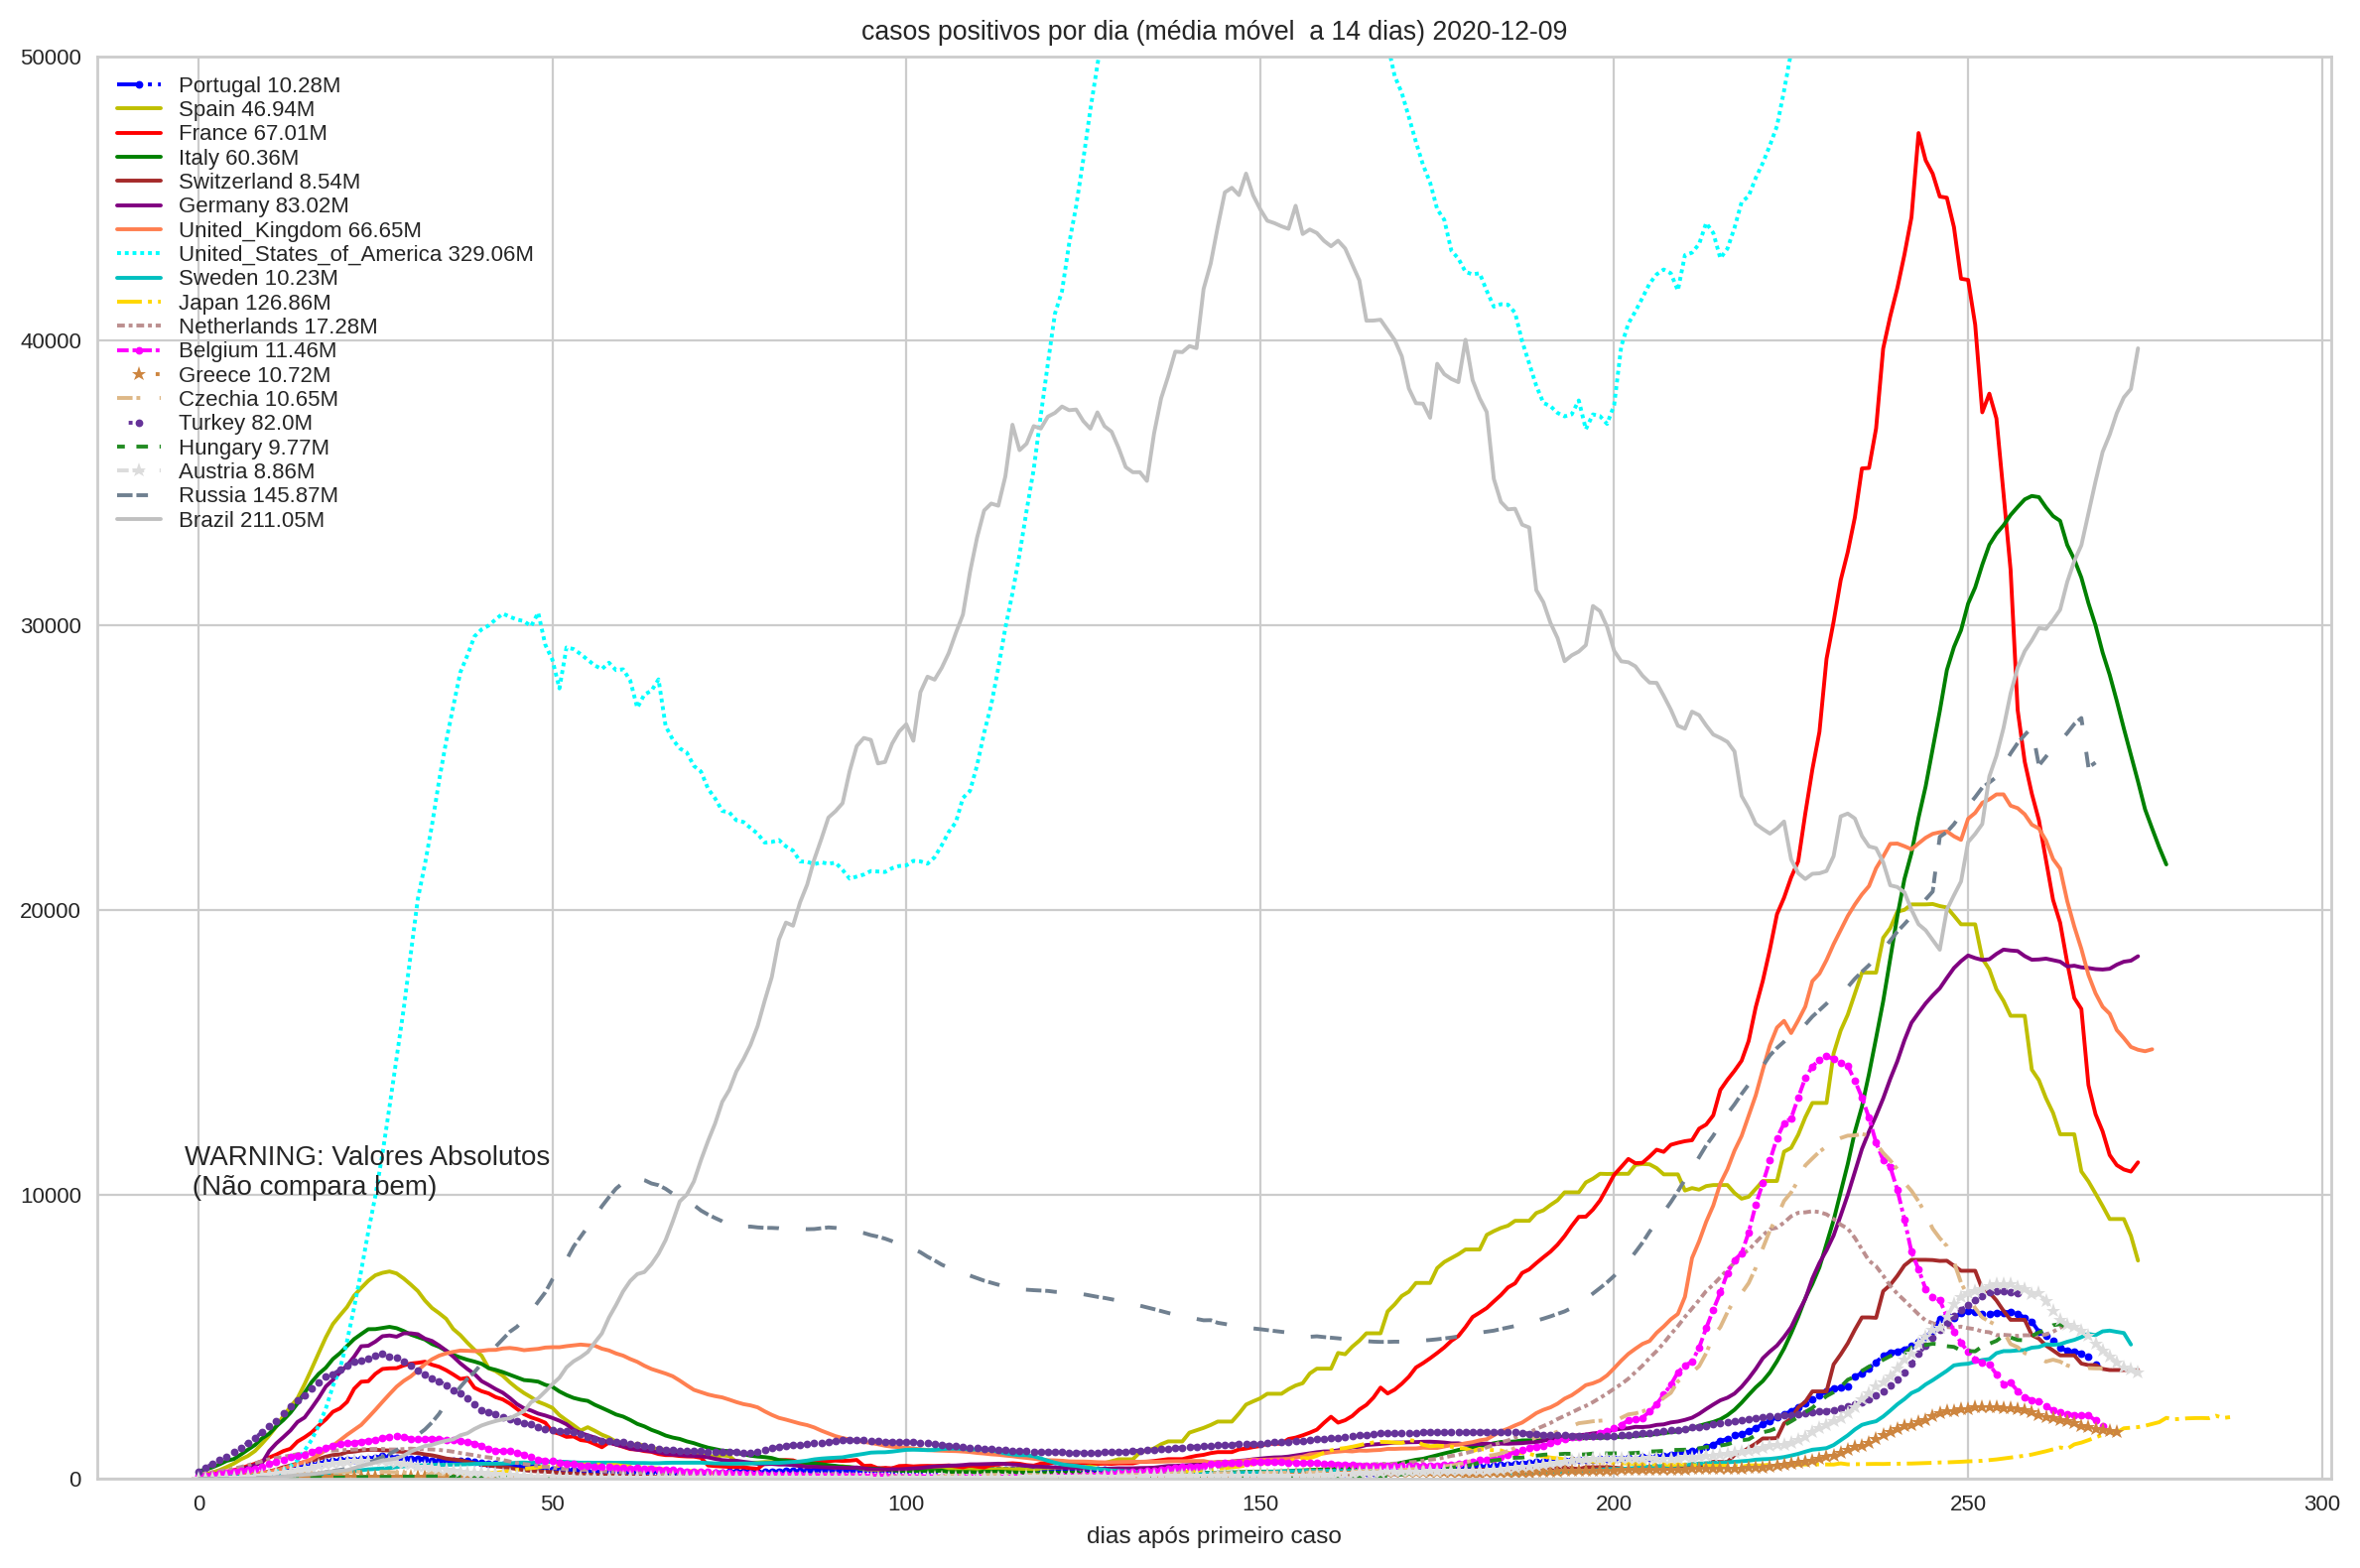

In [9]:
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib  inline
style.use('seaborn-paper')
style.use('seaborn-pastel') 
style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'figure.autolayout': True})
plt.rcParams.update({'legend.labelspacing':0.15})

# # CASOS POSITIVOS
for country in countrieslist0:
    plt.plot(moving_average(country['cases'],MA),
             label=country['country']+' '+str(round(country['pop']/10.0,2))+'M',
             ls=country['ls'],marker=country['markers'],
            color=country['color'])

plt.legend()
plt.ylim(0,50000)
plt.text(-2,10000,'WARNING: Valores Absolutos\n (Não compara bem)')
plt.xlabel("dias após primeiro caso")
plt.title('casos positivos por dia (média móvel  a '+str(MA)+' dias) '+str(date.today()))

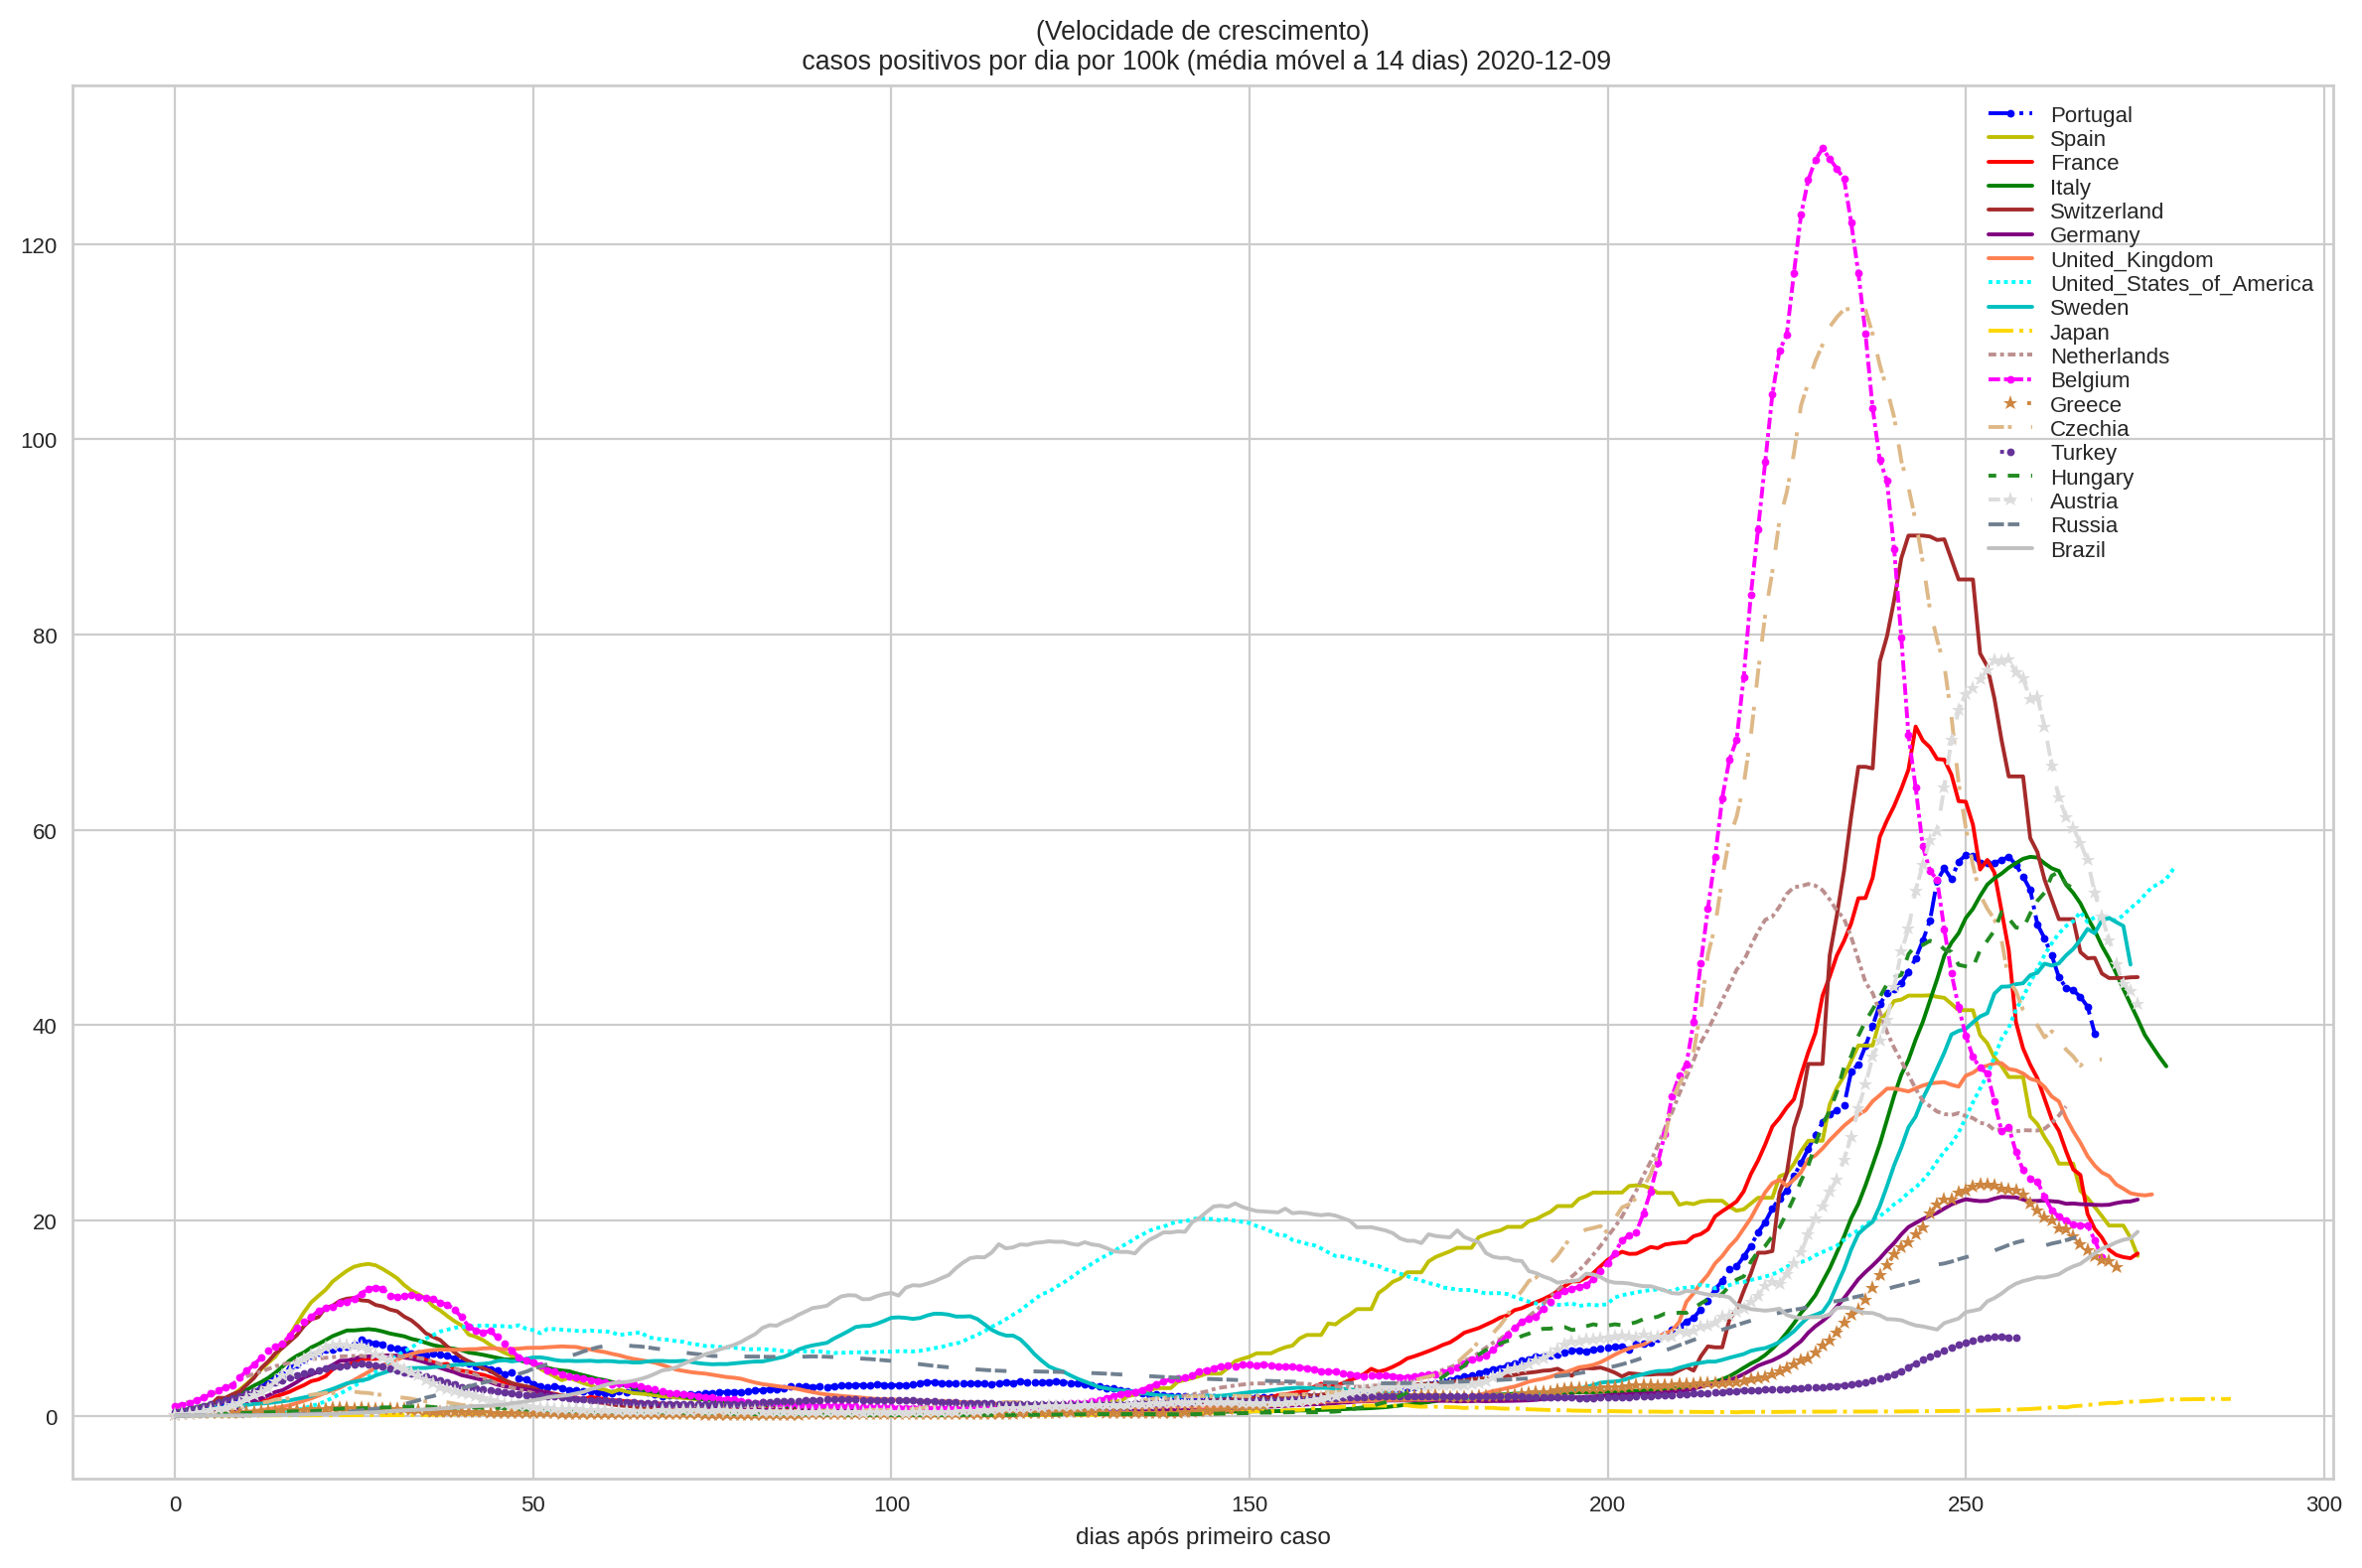

In [10]:
for country in countrieslist0:
    plt.plot(moving_average(country['cases']/country['pop'],MA),
        label=country['country'], ls=country['ls'],marker=country['markers'],color=country['color'])
plt.xlabel("dias após primeiro caso")
plt.title('(Velocidade de crescimento)\n casos positivos por dia por 100k (média móvel a '+str(MA)+' dias) '+str(date.today()))
plt.legend()

Text(0.5, 1.0, 'casos positivos acumulados (por 100k) 2020-12-09')

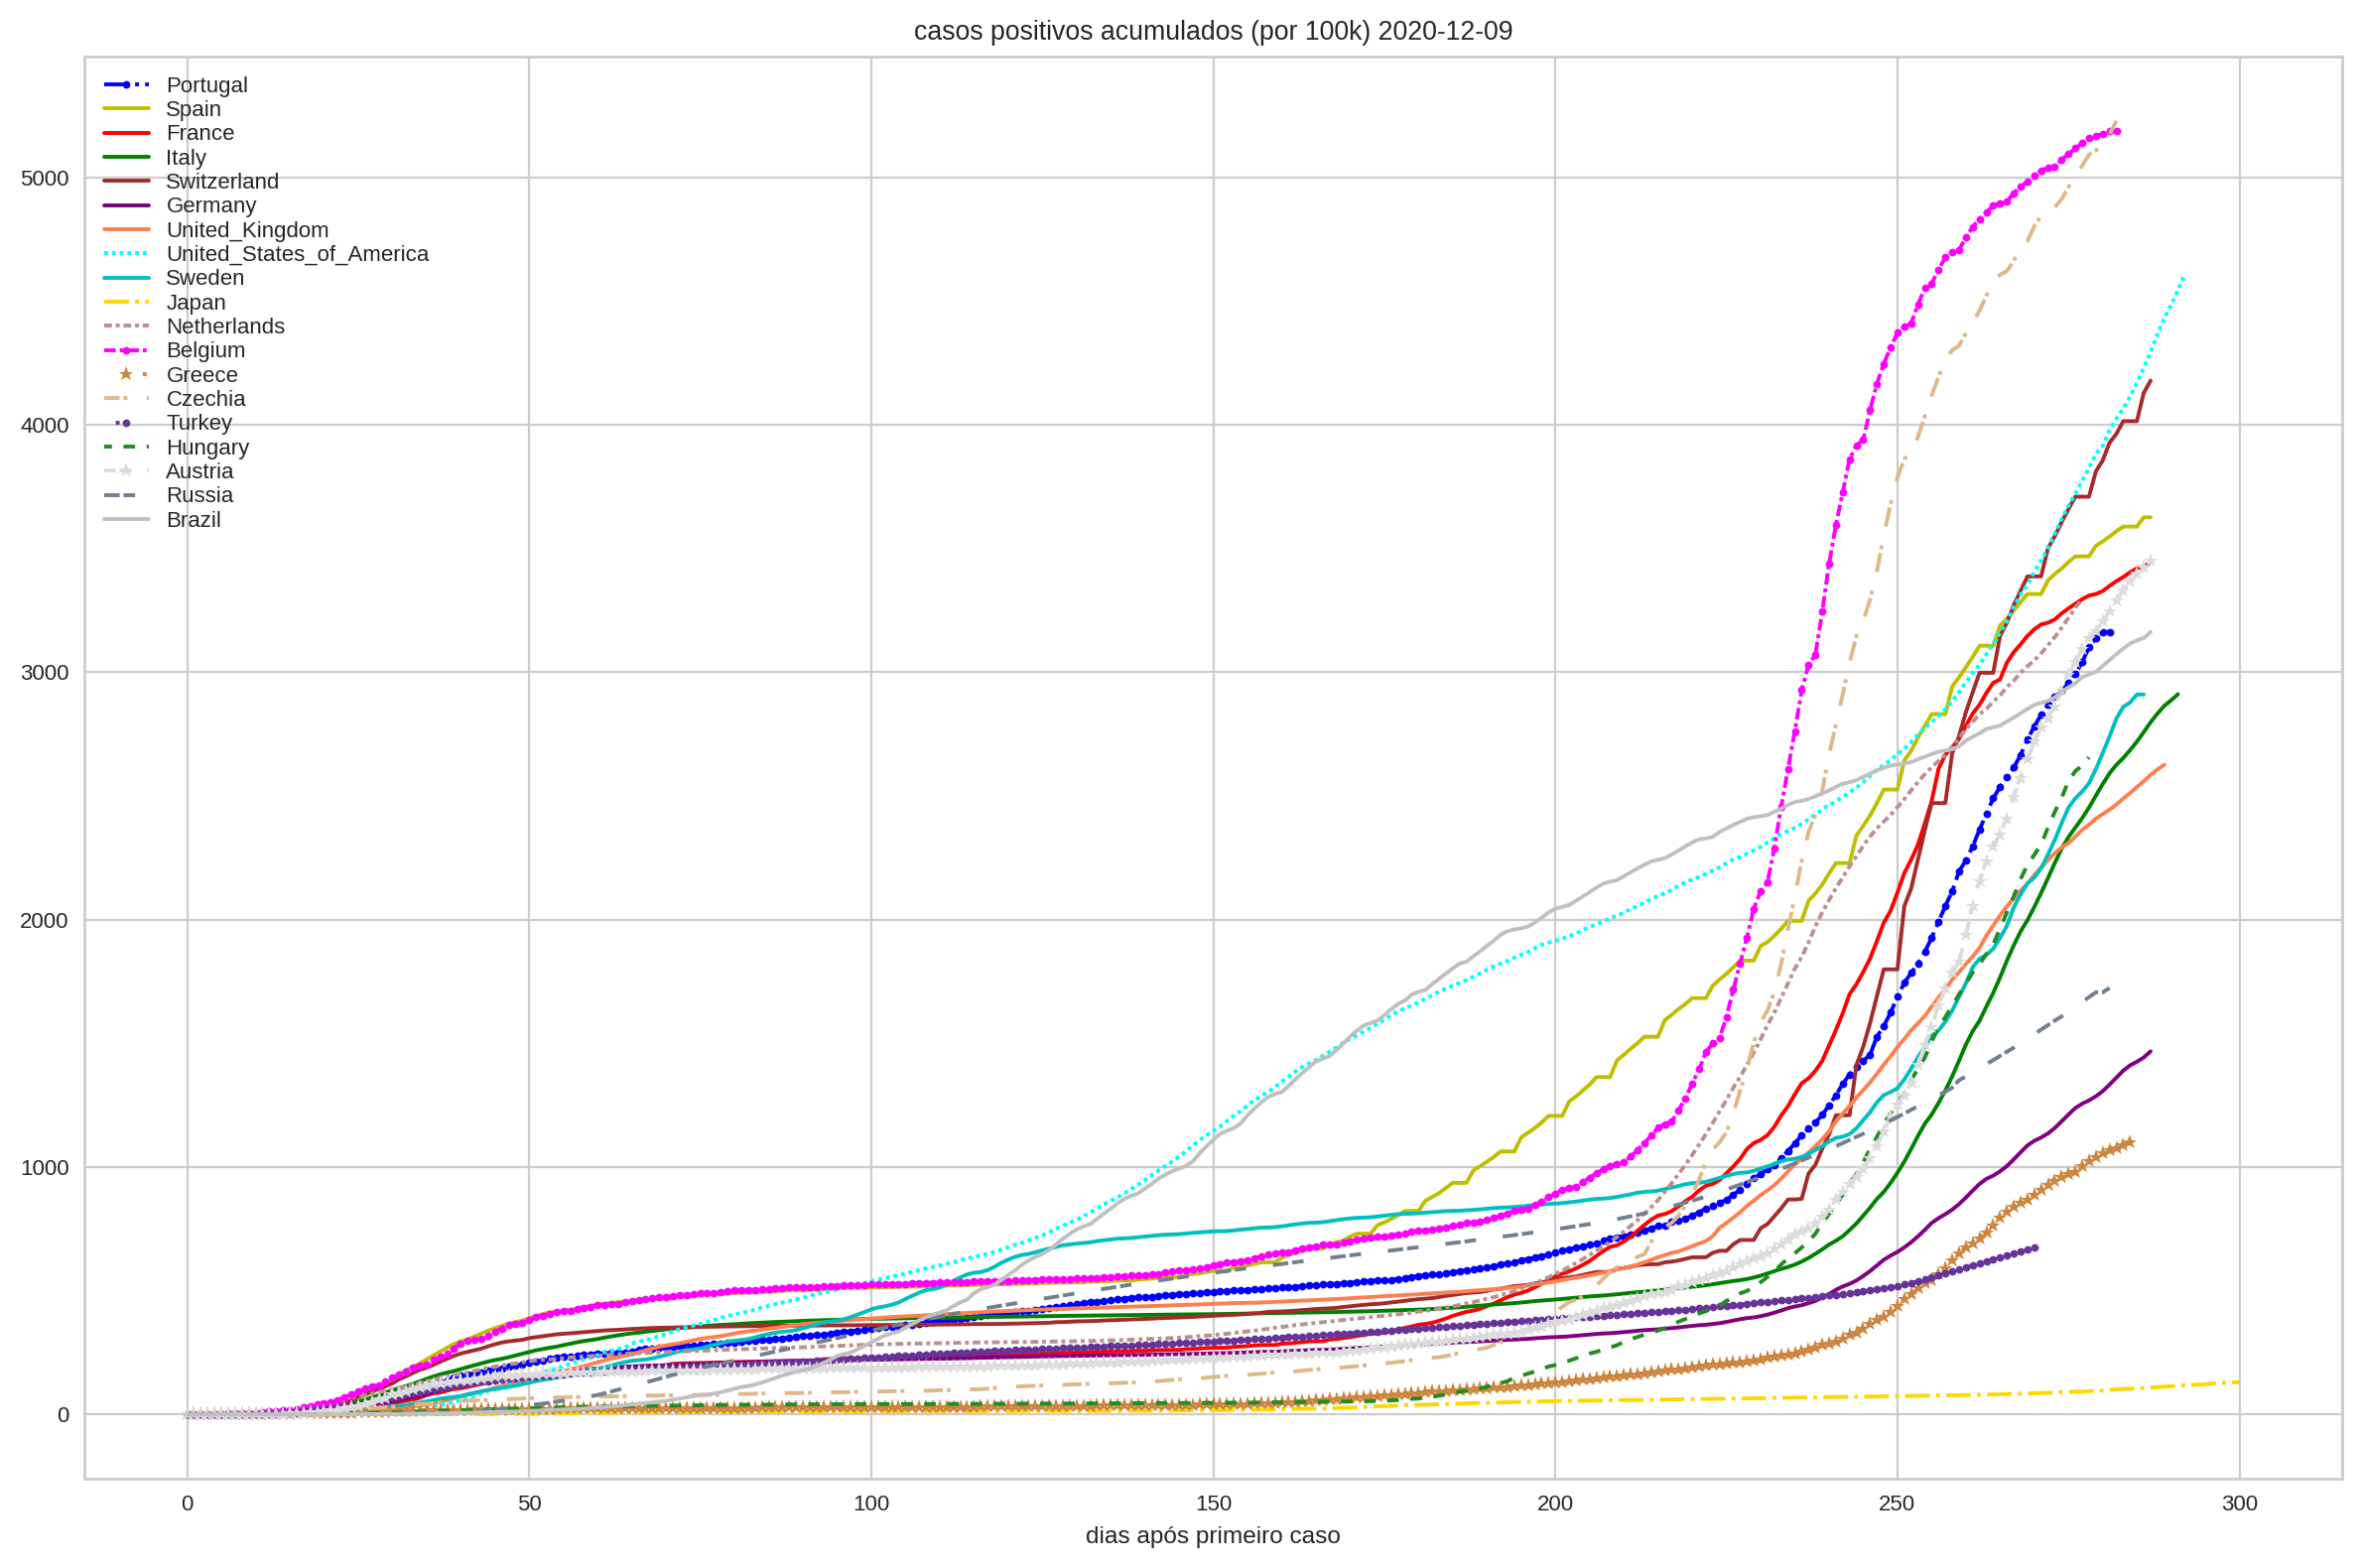

In [11]:
# In[211]:
for country in countrieslist0:
    plt.plot(country['cases'].cumsum()/country['pop'],
             label=country['country'], ls=country['ls'],marker=country['markers'],
             color=country['color'])
plt.legend()
plt.xlabel("dias após primeiro caso")
plt.title('casos positivos acumulados (por 100k) '+str(date.today()))

Text(0.5, 1.0, 'Mortos por dia (valores absolutos média a 14dias)2020-12-09')

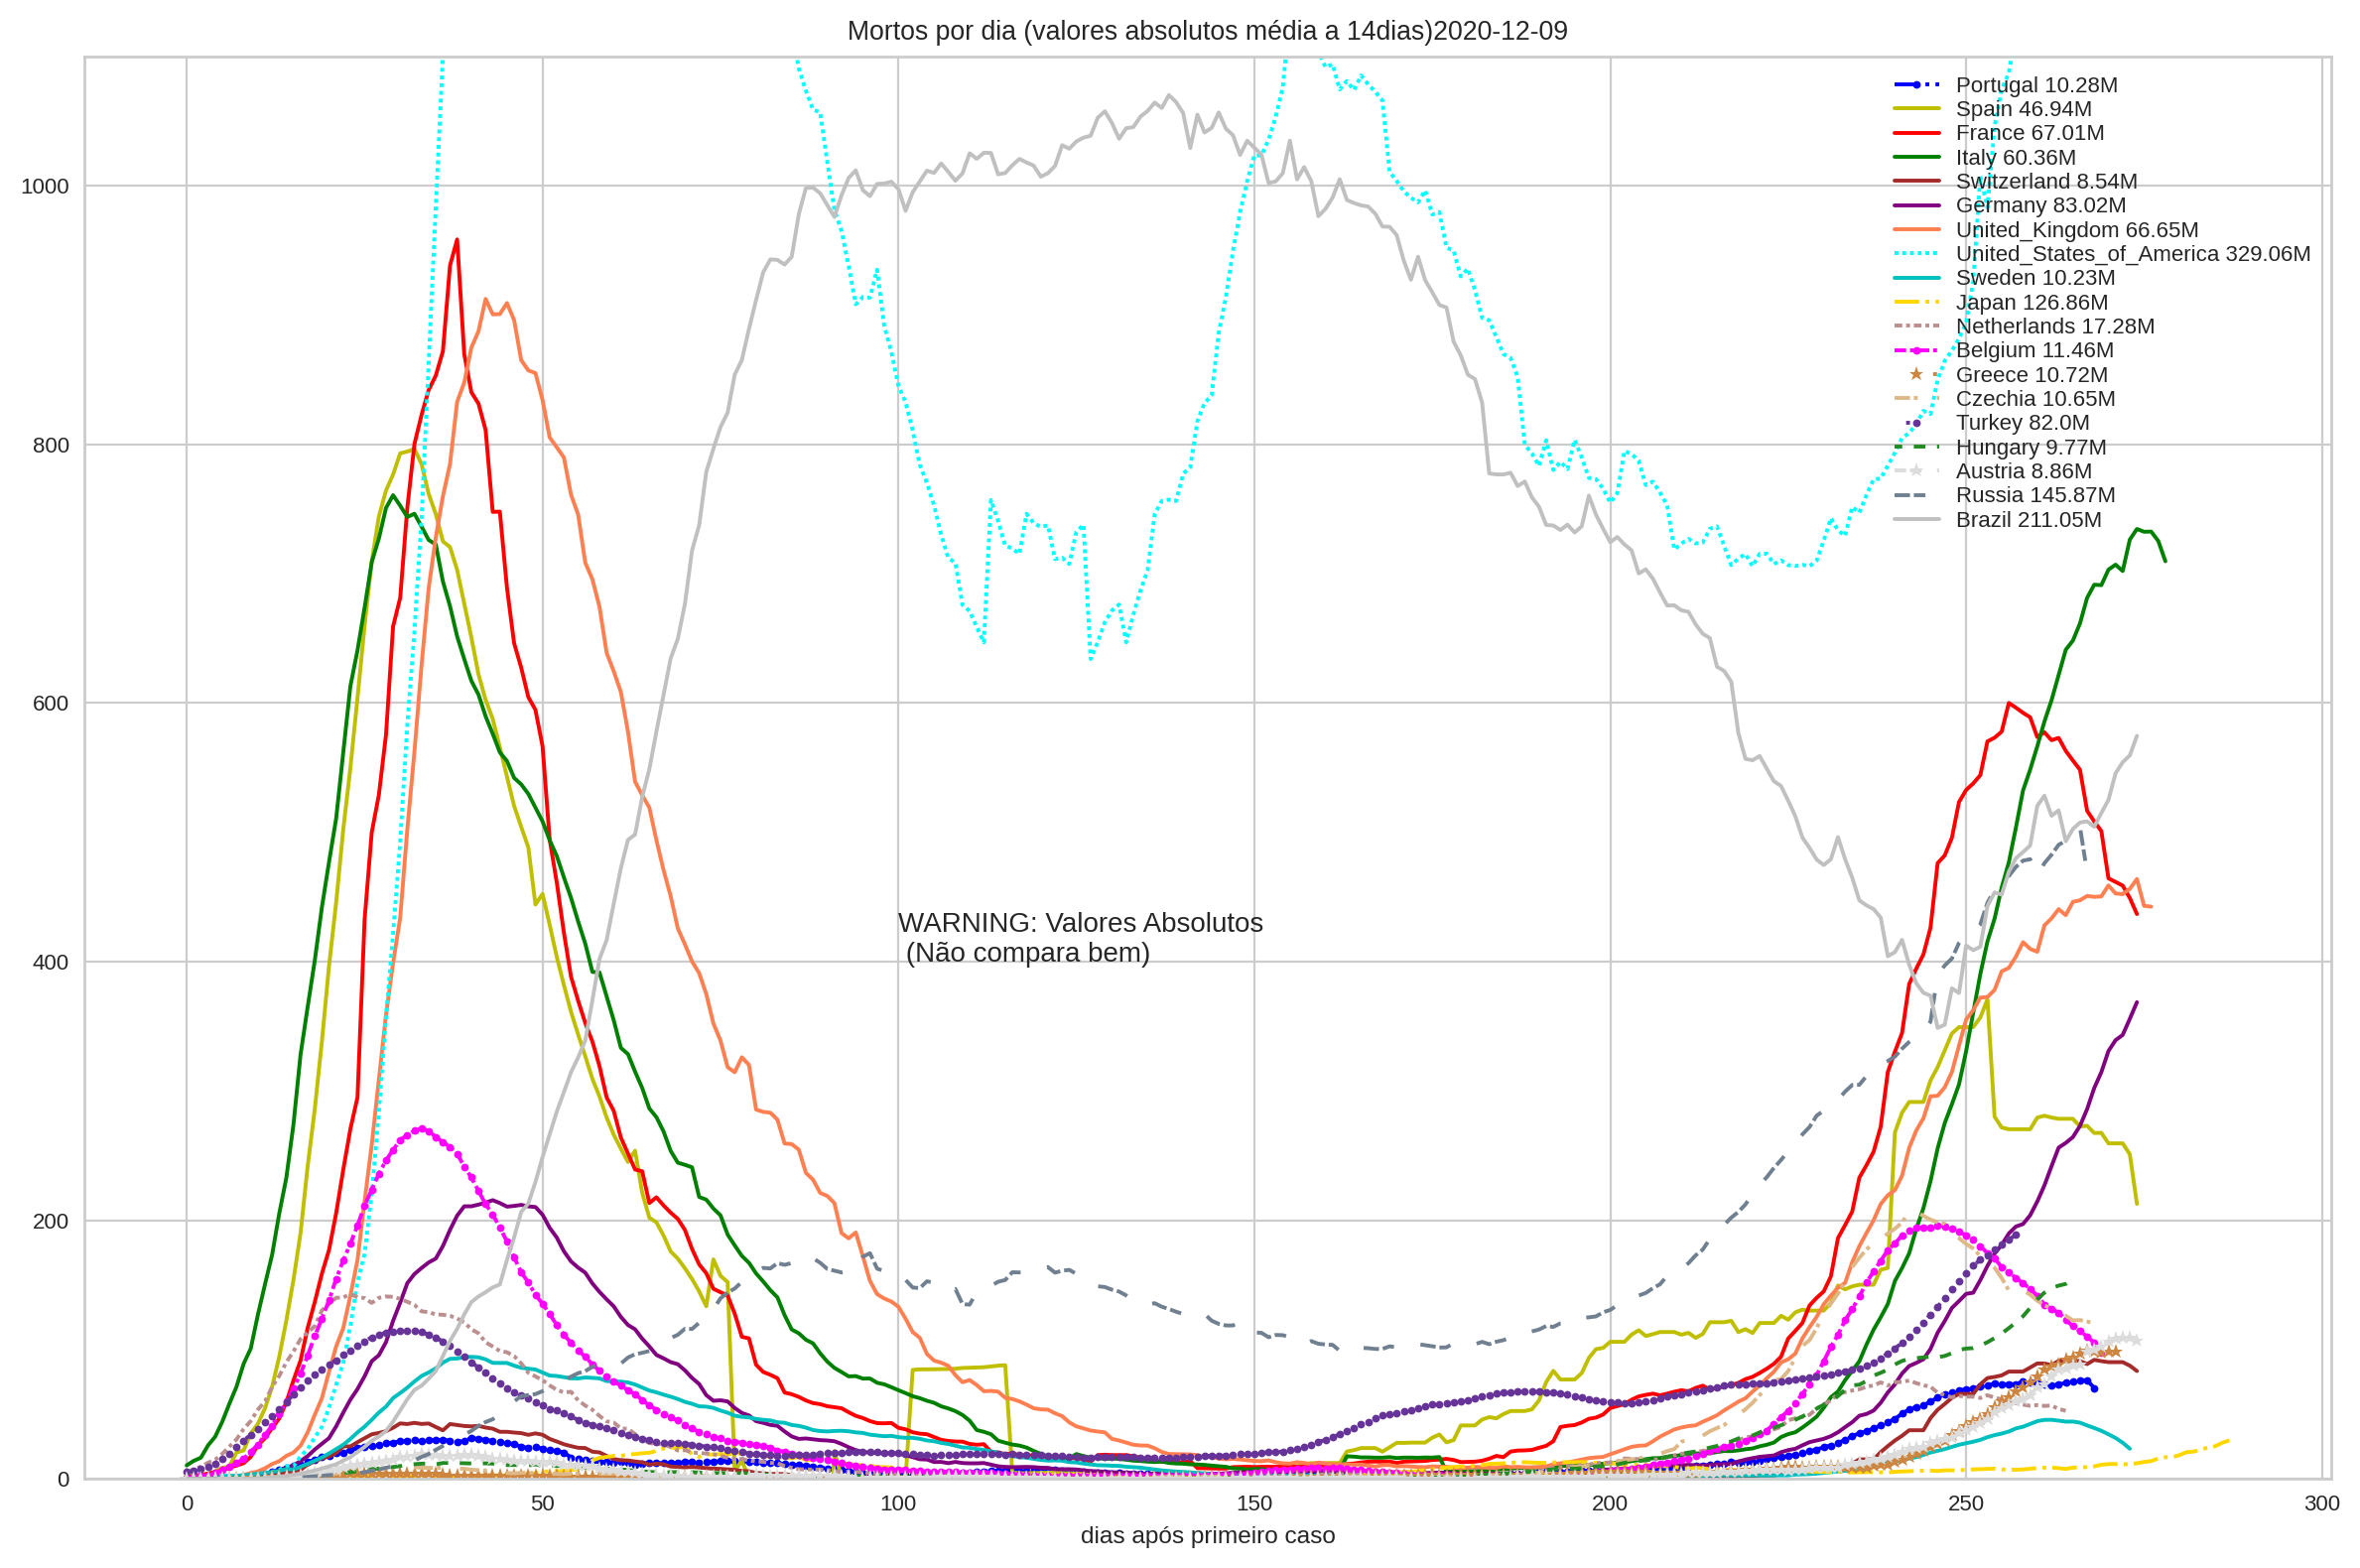

In [12]:
# # MORTOS
for country in countrieslist0:
    plt.plot(moving_average(country['deaths'],MA),
             label=country['country']+' '+str(round(country['pop']/10.0,2))+'M',
             ls=country['ls'],marker=country['markers'],
             color=country['color'])
plt.legend(loc='upper right')
plt.ylim(0,1100)
plt.text(100,400,'WARNING: Valores Absolutos\n (Não compara bem)')
plt.xlabel("dias após primeiro caso")
plt.title('Mortos por dia (valores absolutos média a '+str(MA)+'dias)'+str(date.today()))

Text(0.5, 1.0, 'Evolução do nº de mortos por 100k 2020-12-09')

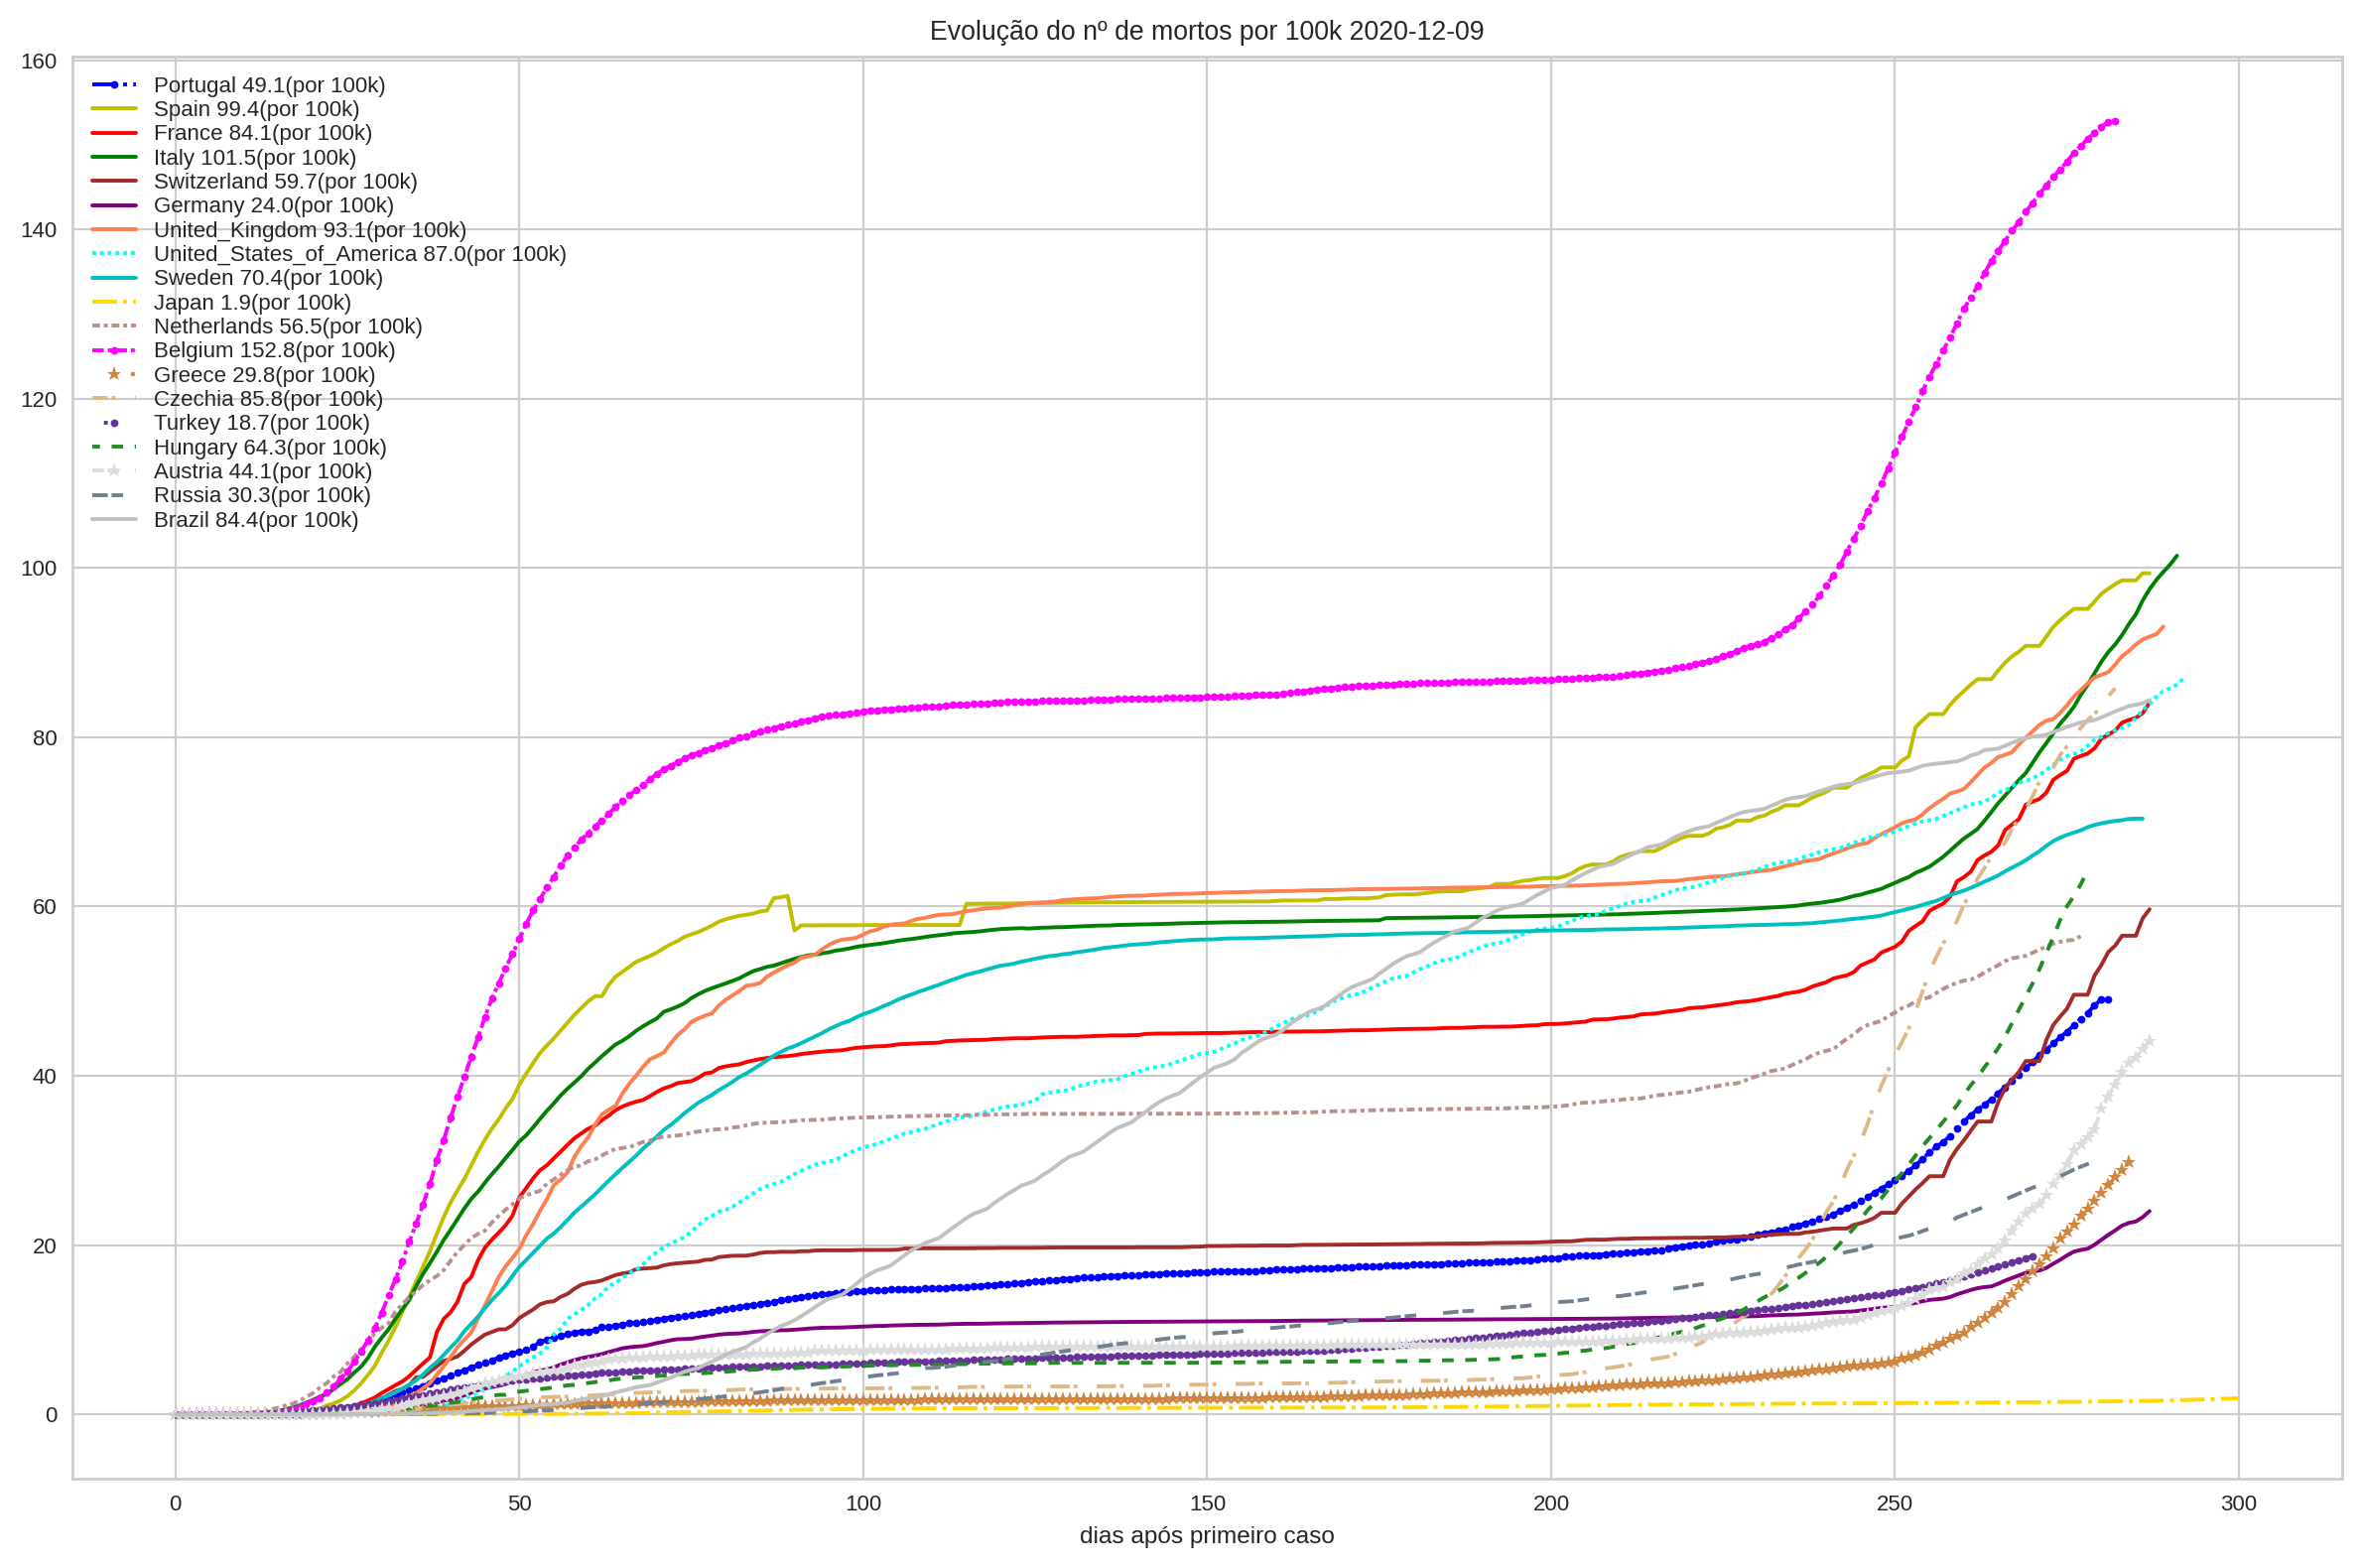

In [13]:
for country in countrieslist0:
    plt.plot(country['deaths'].cumsum()/country['pop'],
             label=country['country']+' '+
             str(round(country['deaths'].cumsum().max()/country['pop'],1))+'(por 100k)',
             ls=country['ls'],marker=country['markers'],
             color=country['color'])
plt.xlabel("dias após primeiro caso")
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in plt.gca().get_yticks()])
plt.legend(loc='upper left')
plt.title('Evolução do nº de mortos por 100k '+str(date.today()))

Text(0.5, 1.0, 'Evolução do nº de recuperados por 100k 2020-12-09')

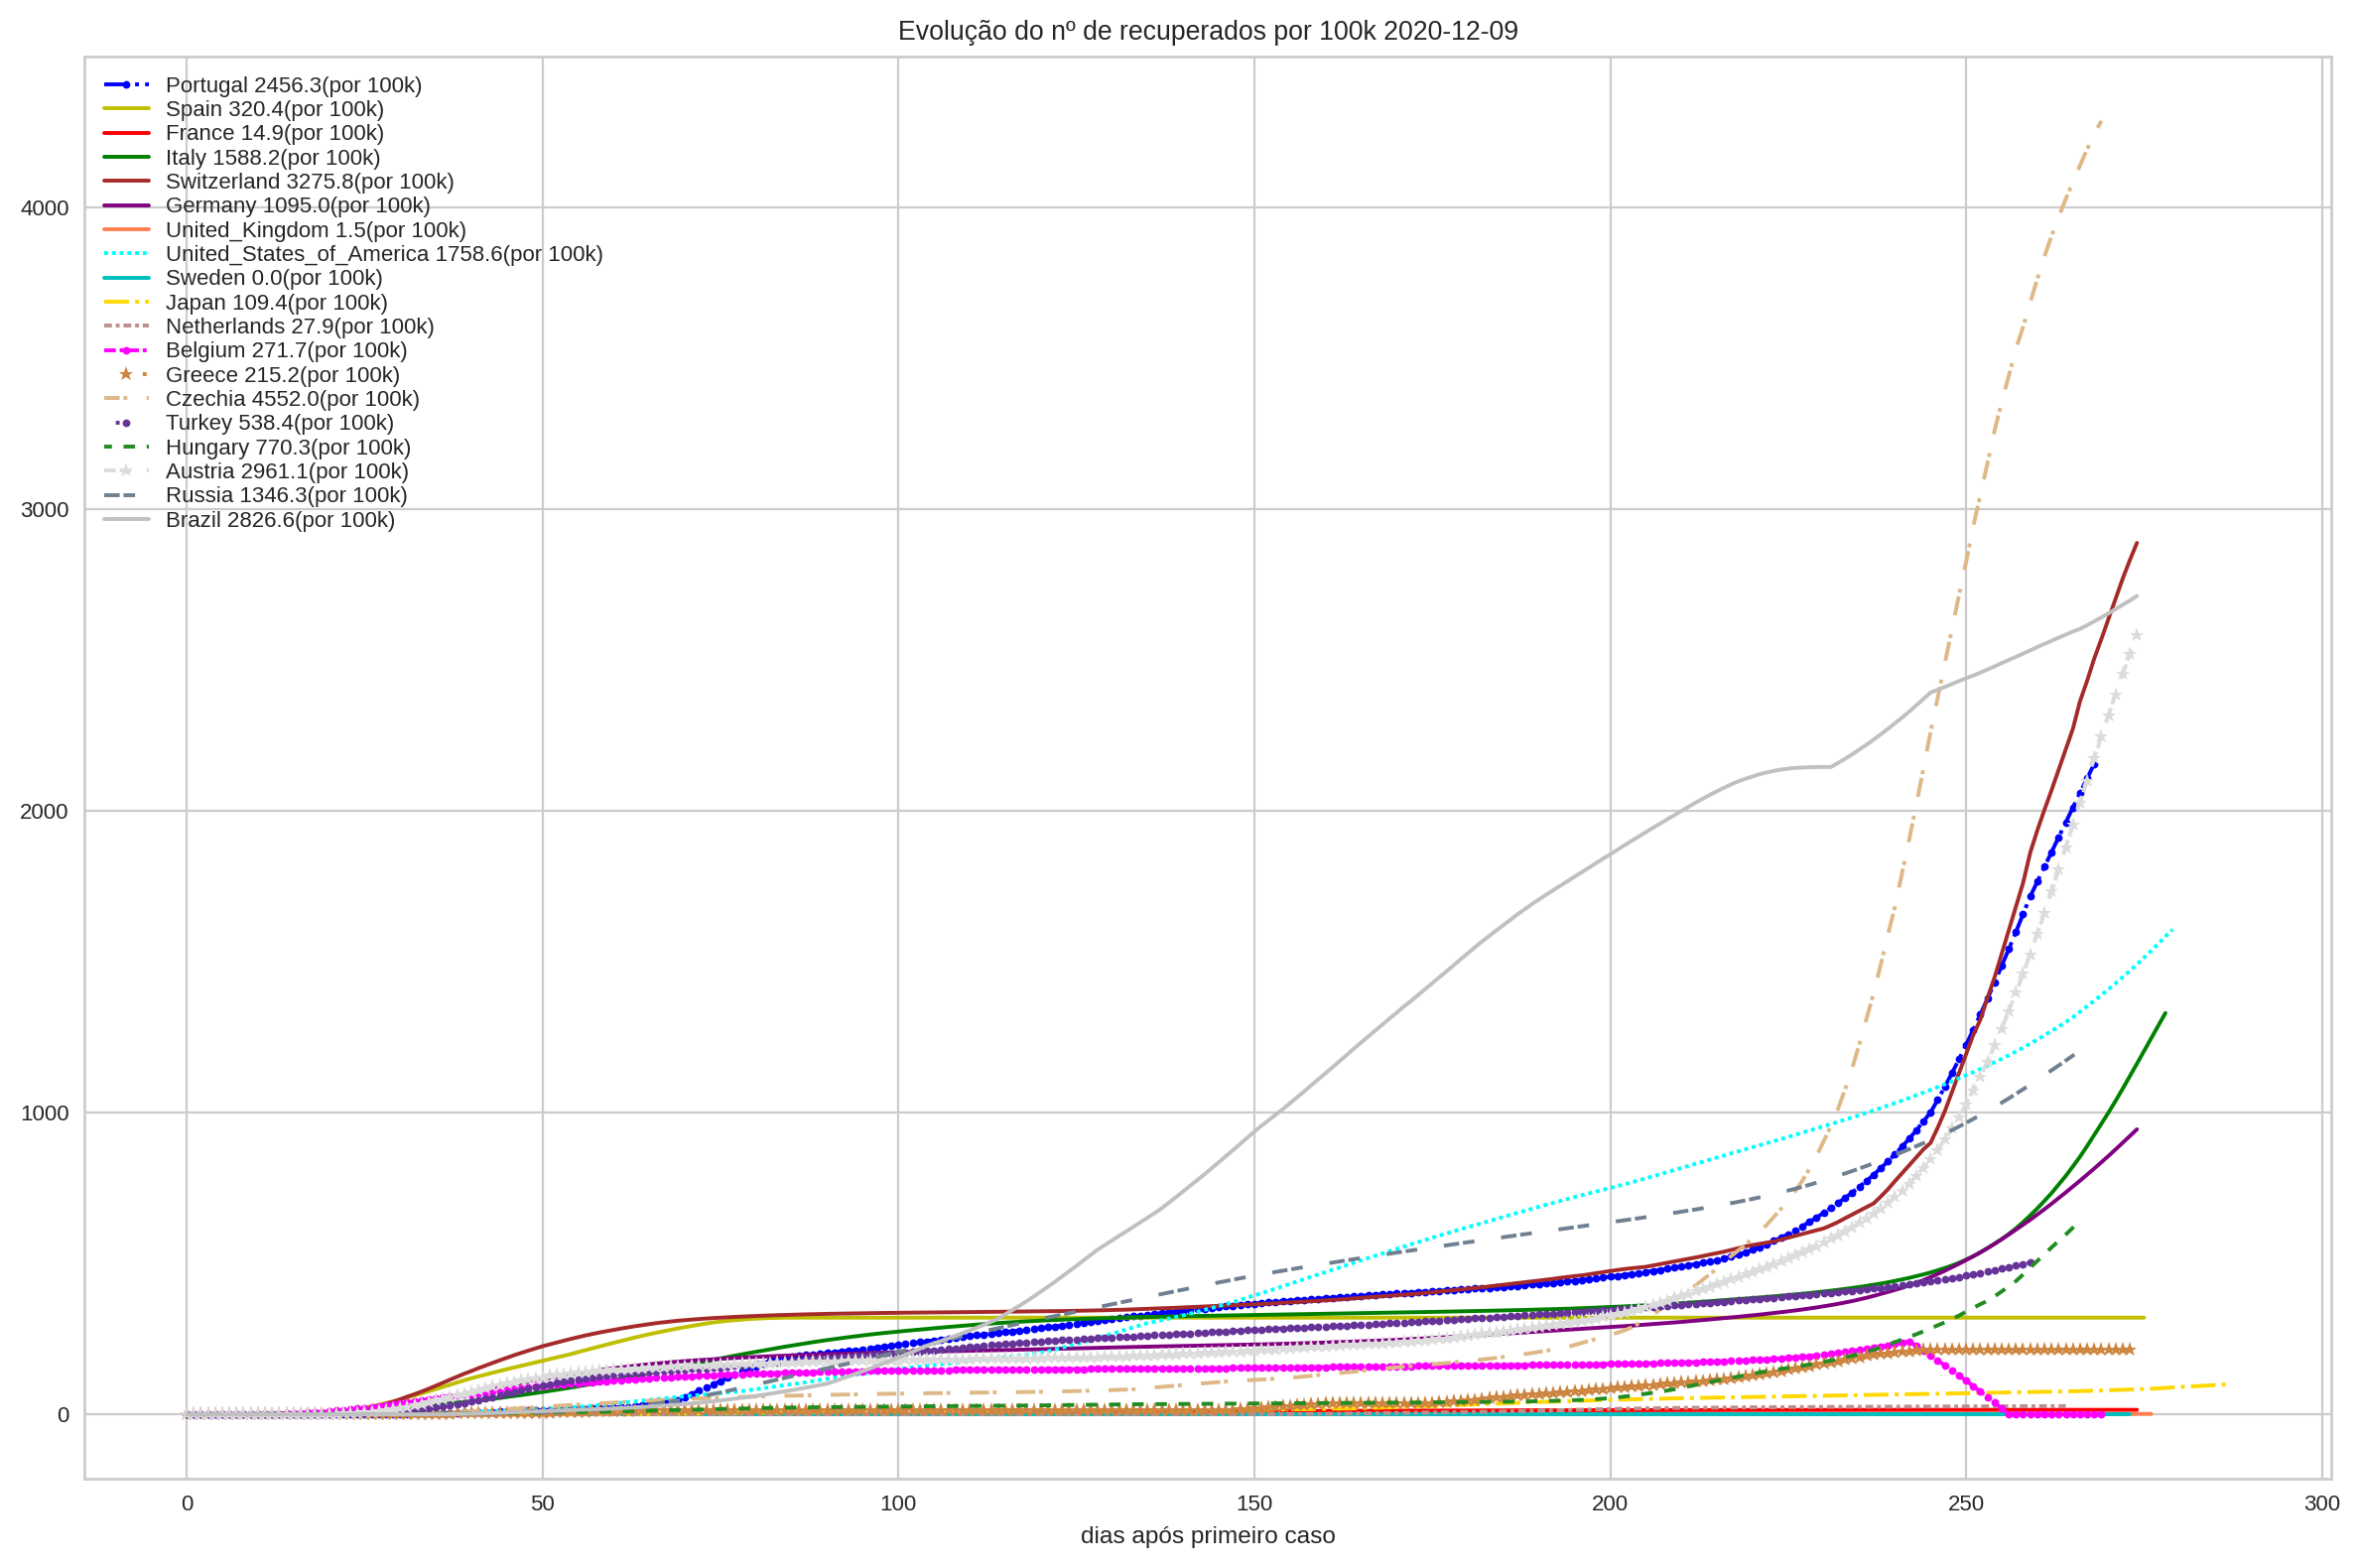

In [15]:
############################################## RECUPERADOS #################
for country in countrieslist0:
    plt.plot(moving_average(country['recovered']/country['pop'],MA),
             label=country['country']+' '+
             str(round(country['recovered'].max()/country['pop'],1))+'(por 100k)',
             ls=country['ls'],marker=country['markers'],
             color=country['color'])

plt.xlabel("dias após primeiro caso")
plt.legend(loc='upper left')
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in plt.gca().get_yticks()])
plt.title('Evolução do nº de recuperados por 100k '+str(date.today()))

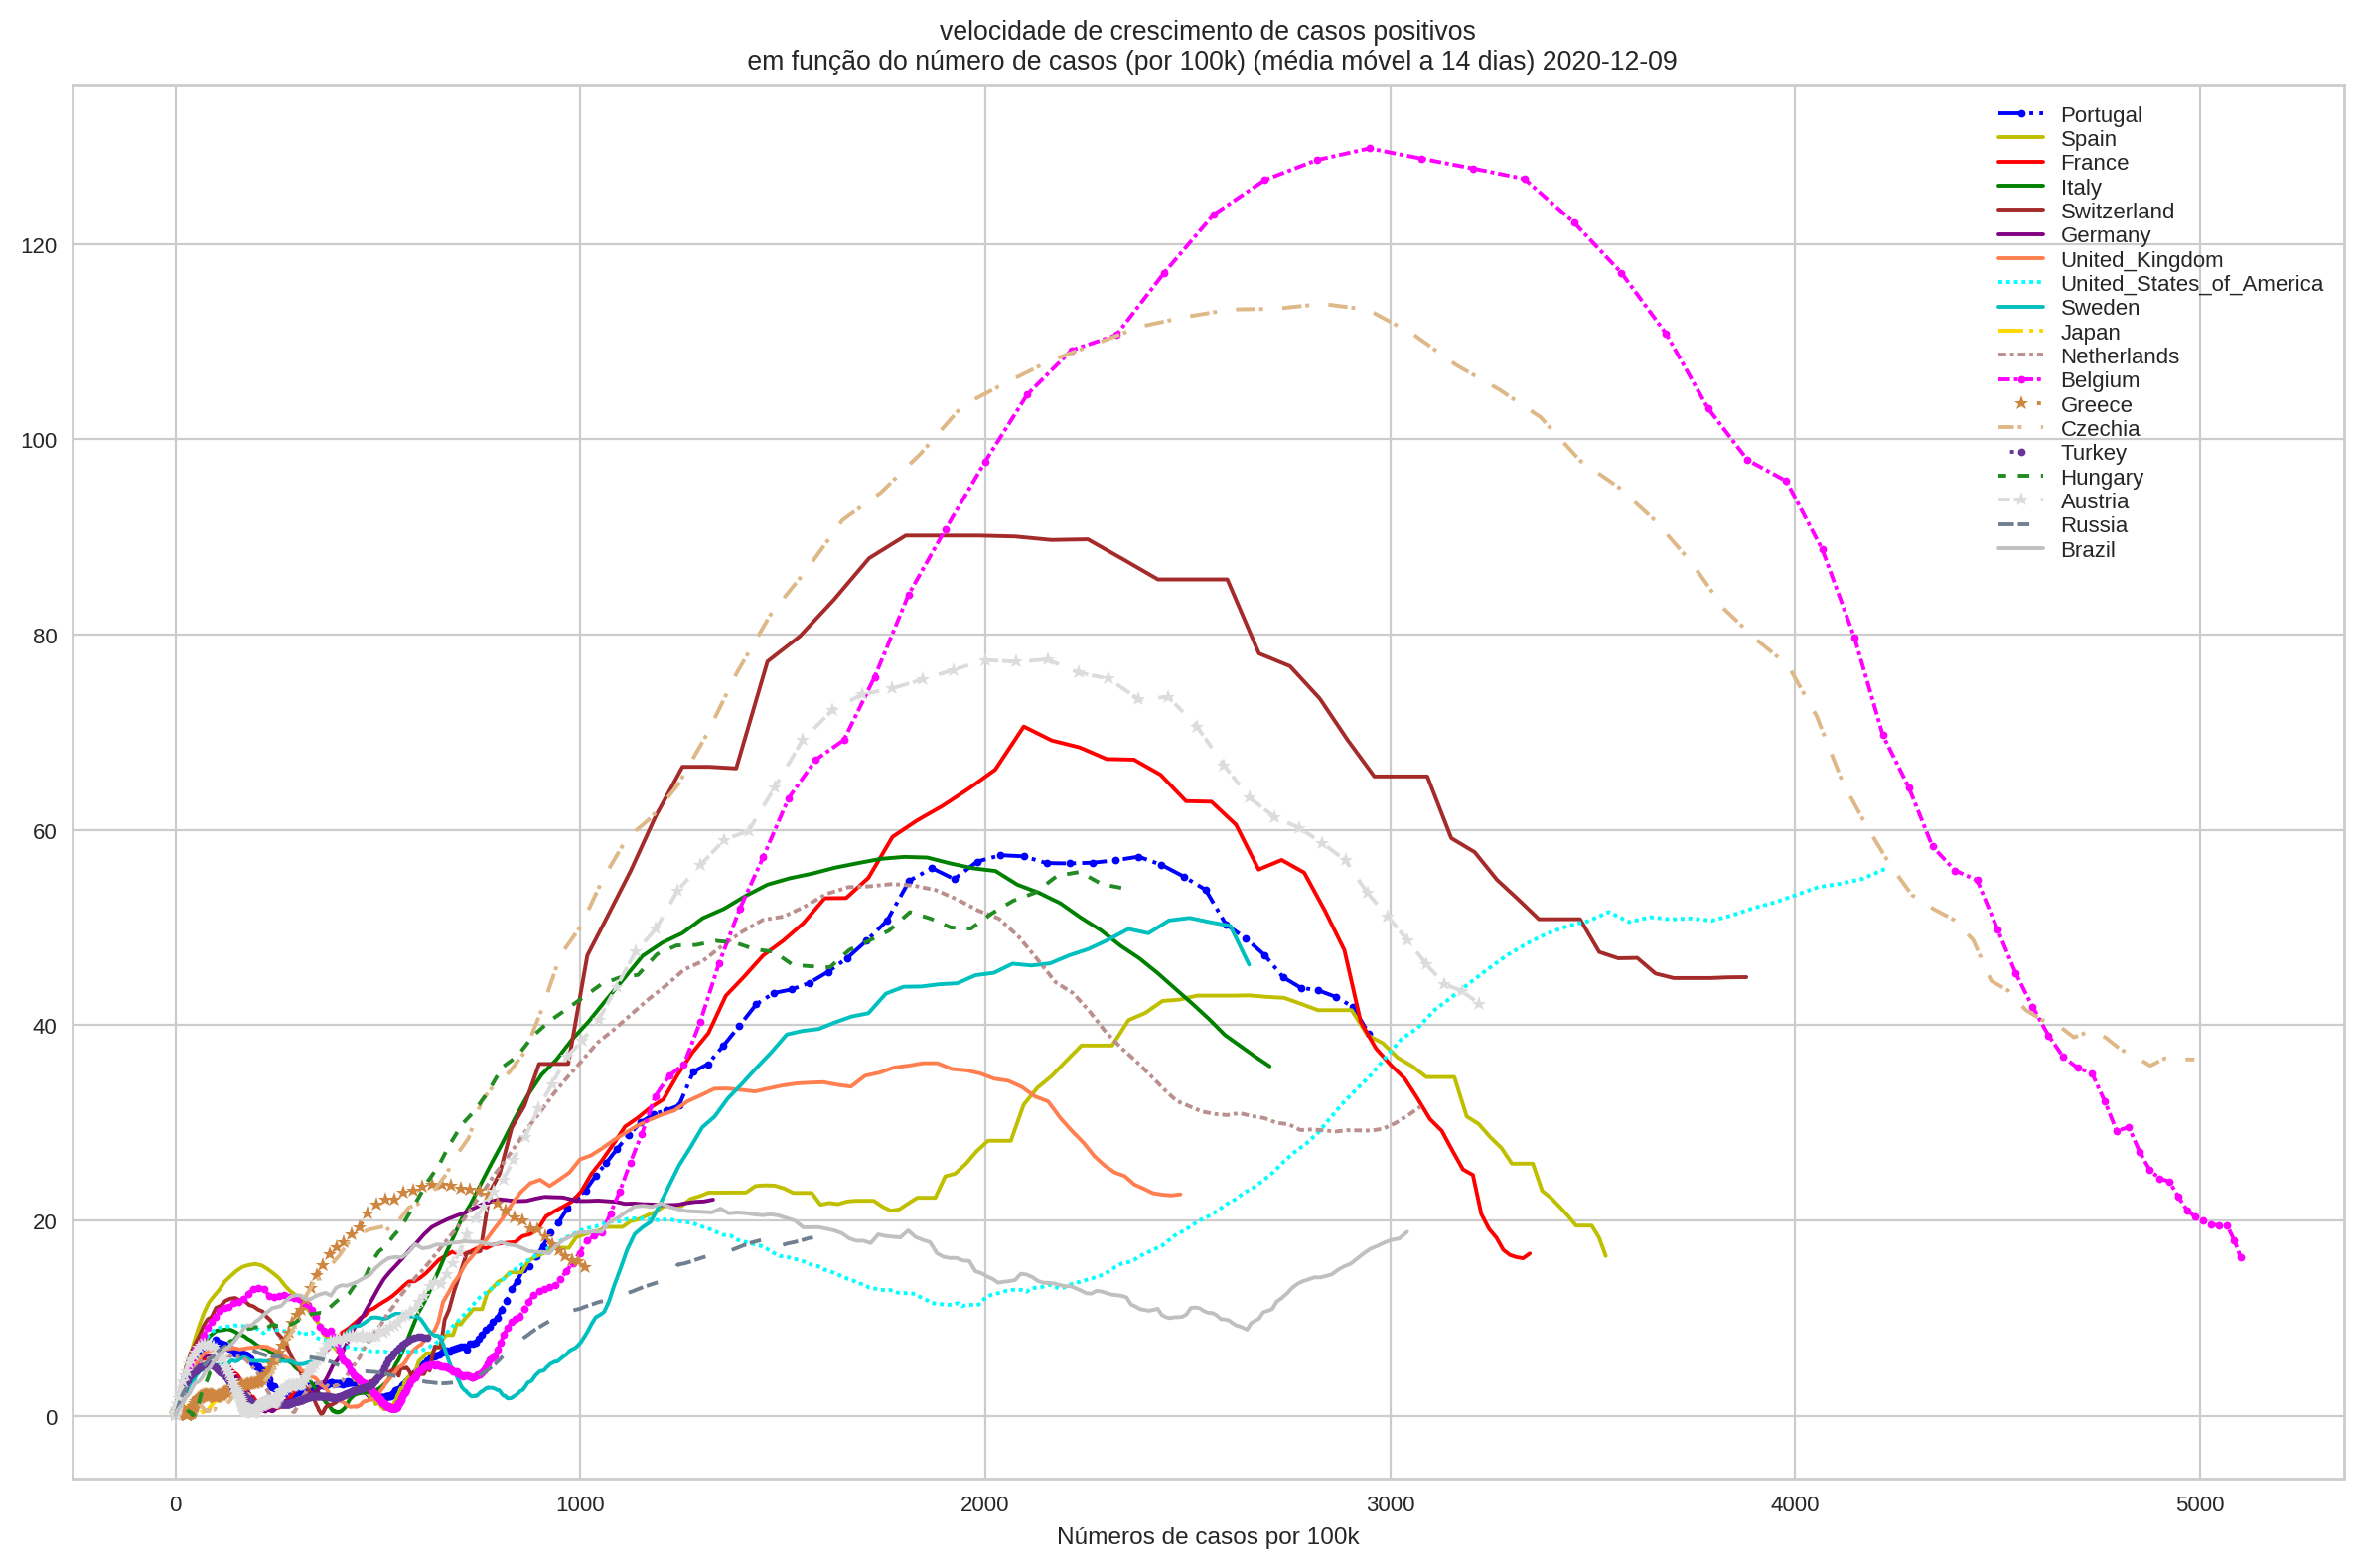

In [16]:
#  # CURVAS DE FASE DE CRESCIMENTO DE CASOS POSITIVOS
for country in countrieslist0:
    plt.plot(moving_average(country['cases'].cumsum()/country['pop'],MA),moving_average(country['cases']/country['pop'],MA),
             label=country['country'], ls=country['ls'],marker=country['markers'],color=country['color'])
plt.xlabel("Números de casos por 100k")
plt.title('velocidade de crescimento de casos positivos\n em função do número de casos (por 100k) (média móvel a '+str(MA)+' dias) '+str(date.today()))
plt.legend()

Text(0.5, 1.0, 'Evolução do nº mortos por nº casos (média a 14 dias) 2020-12-09')

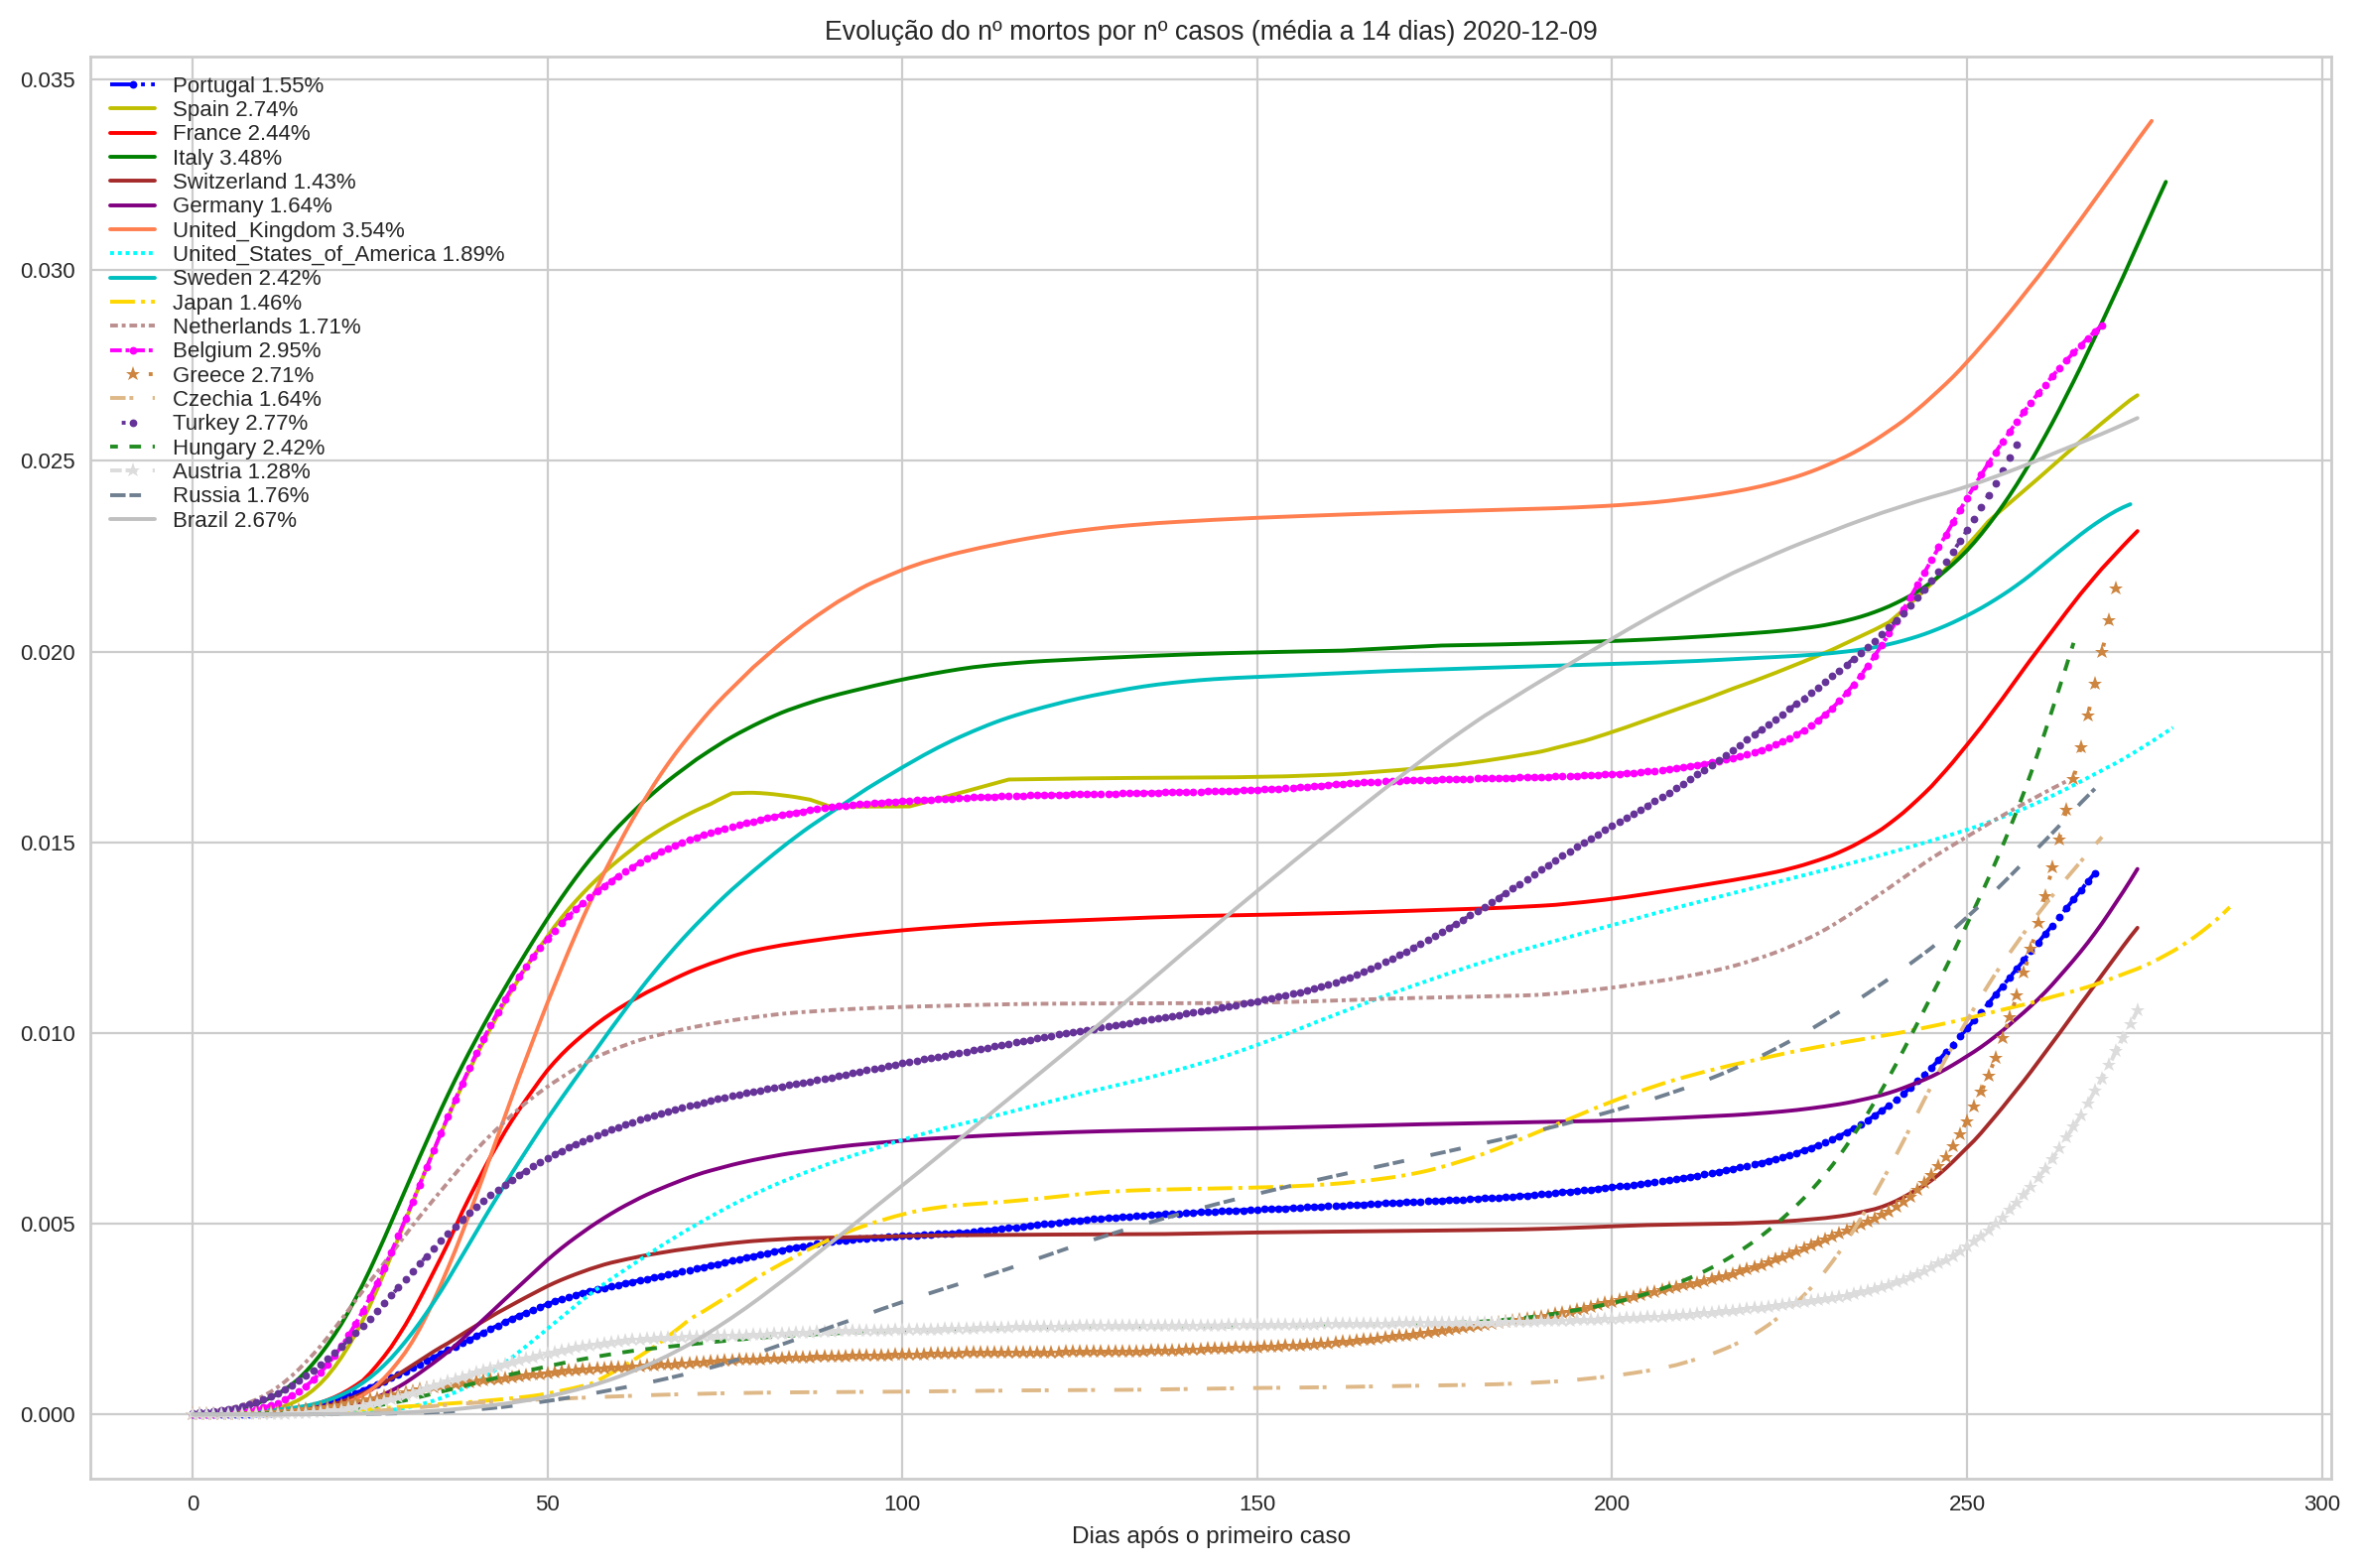

In [18]:
for country in countrieslist0:
    plt.plot(moving_average(
        country['deaths'].cumsum()/
        country['cases'].sum(),MA),
        label=country['country']+' '+str(round(country['deaths'].sum()/country['cases'].sum()*100,2))+'%',
             ls=country['ls'],marker=country['markers'],
        color=country['color'])

plt.xlabel("Dias após o primeiro caso")
plt.legend(loc='upper left')
plt.title('Evolução do nº mortos por nº casos (média a '+str(MA)+' dias) '+str(date.today()))

Text(0.5, 1.0, '(fase) nº mortos/100k em função do nº casos/100k 2020-12-09')

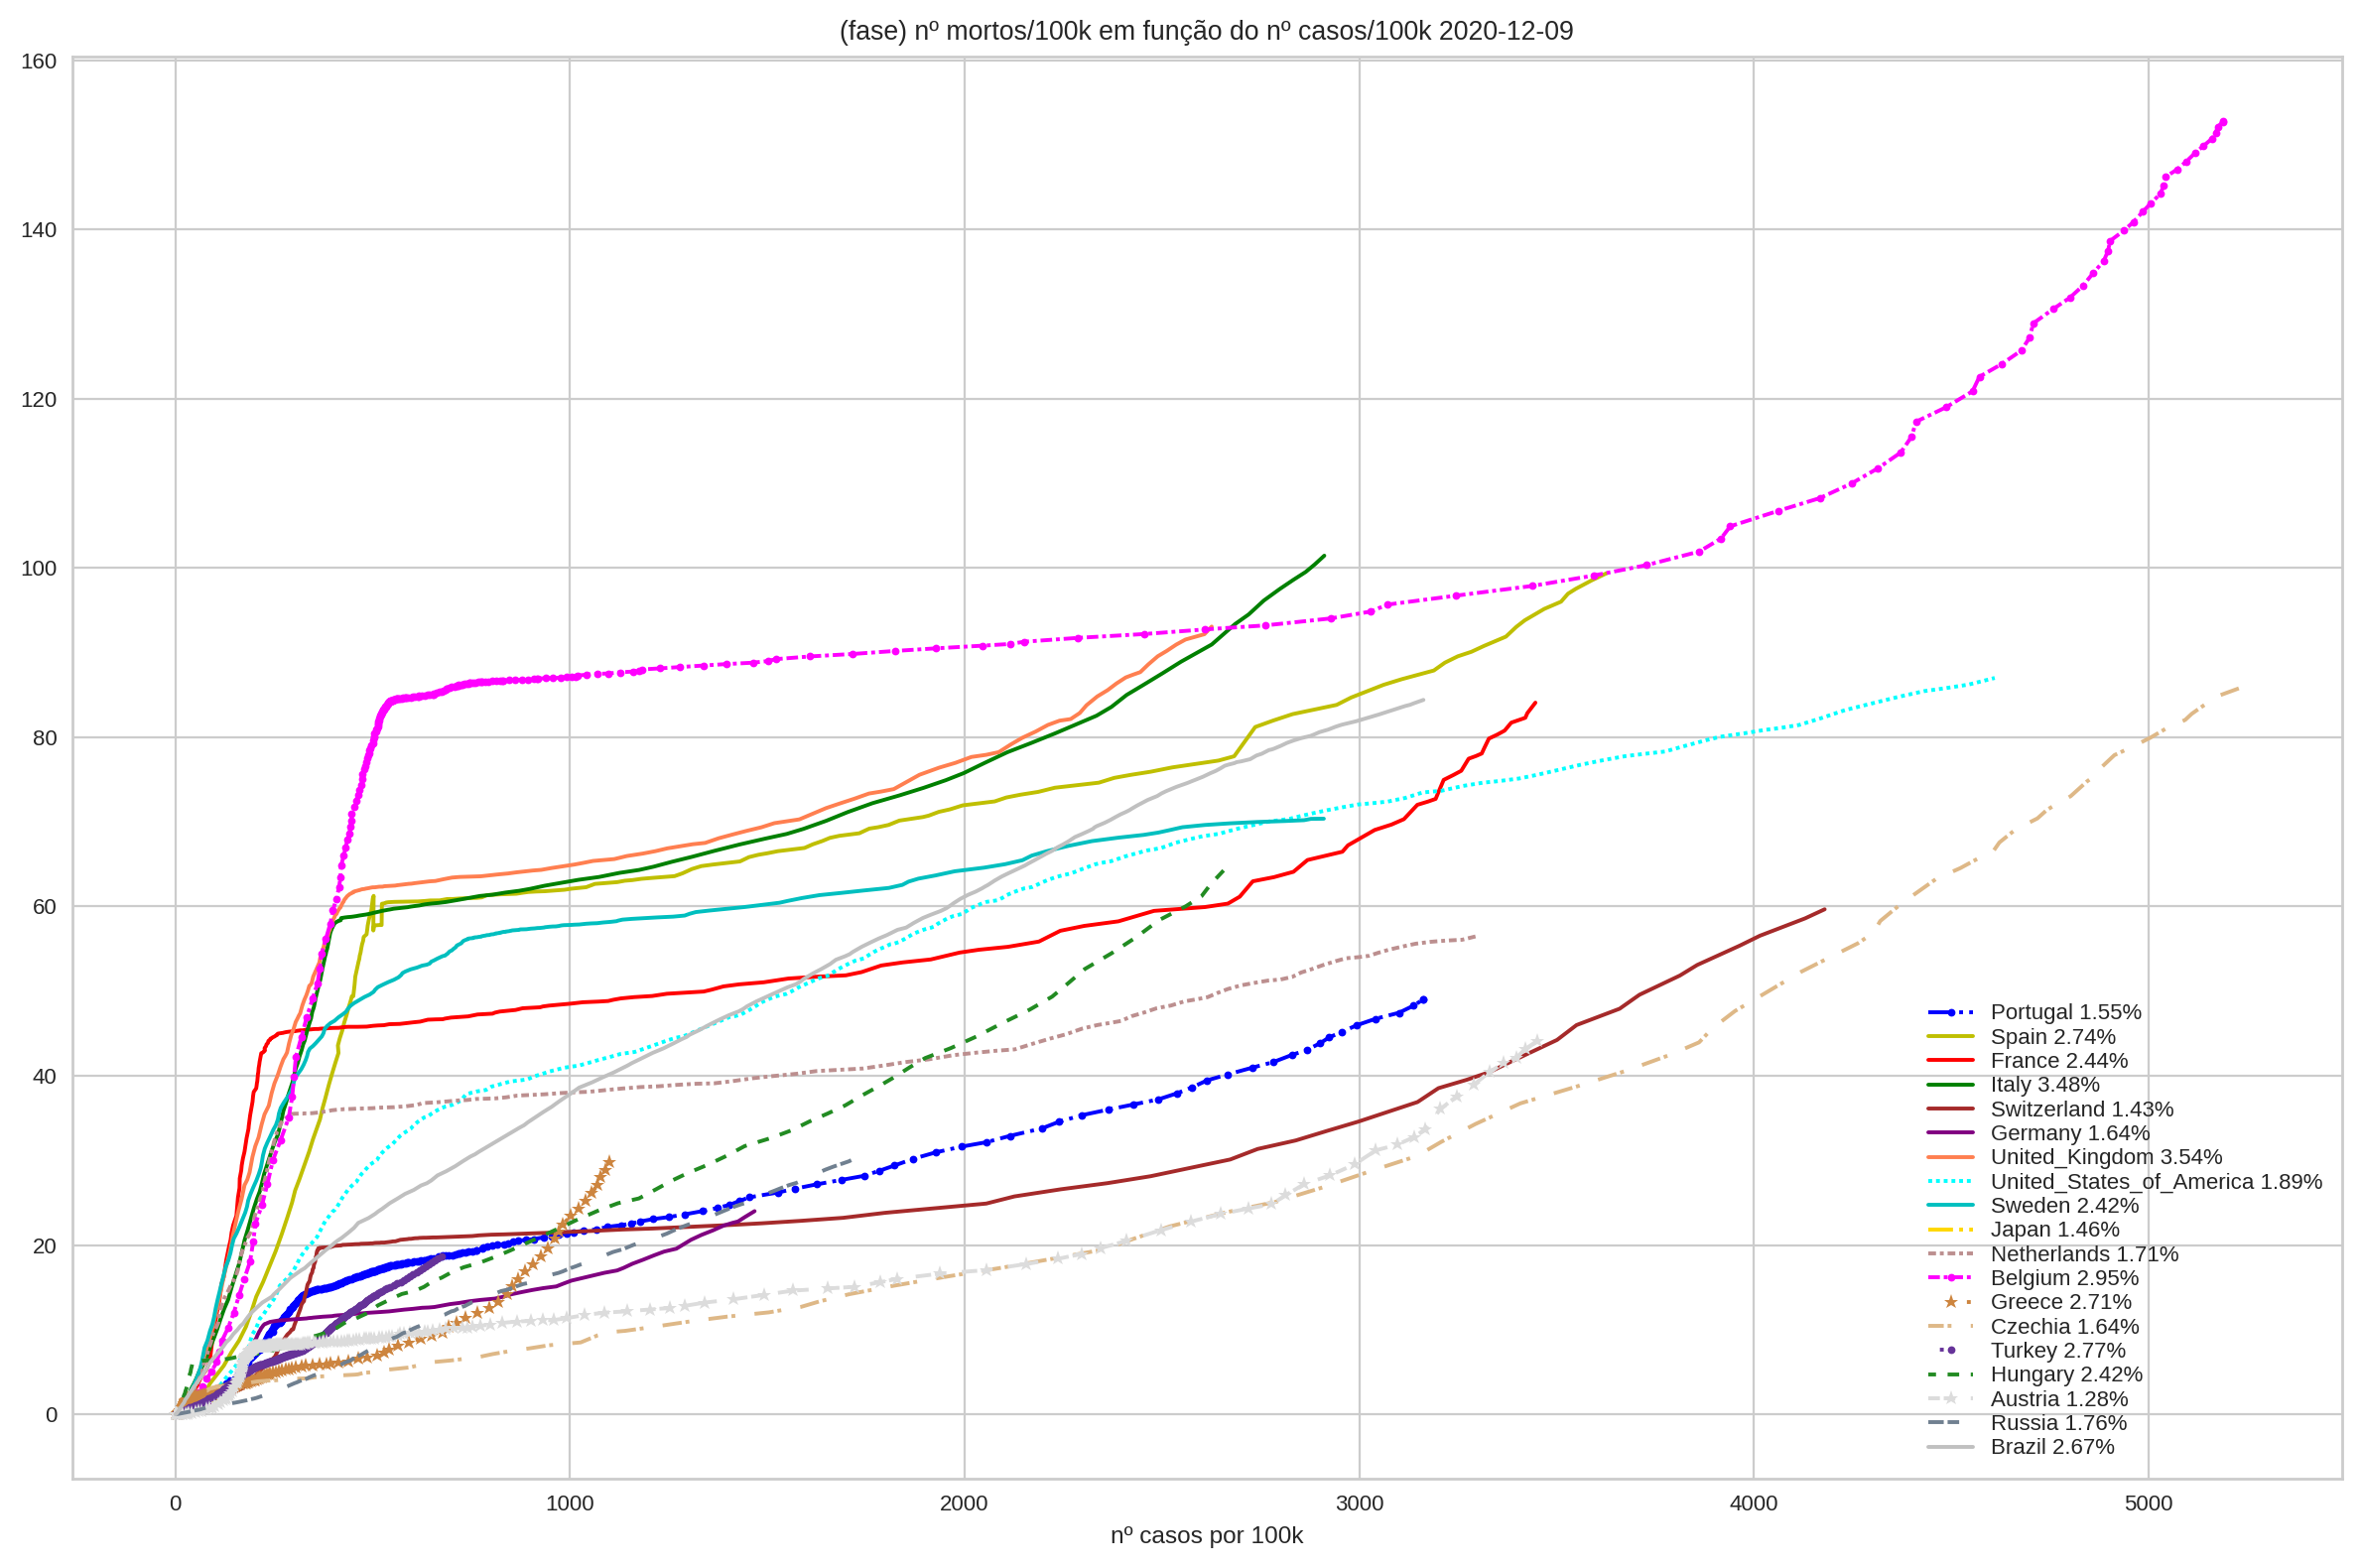

In [19]:
for country in countrieslist0:
    plt.plot(country['cases'].cumsum()/country['pop'],country['deaths'].cumsum()/country['pop'],
        label=country['country']+' '+str(round(country['deaths'].sum()/country['cases'].sum()*100,2))+'%',
             ls=country['ls'],marker=country['markers'],
        color=country['color'])

plt.xlabel("nº casos por 100k")
plt.legend(loc='lower right')
plt.title('(fase) nº mortos/100k em função do nº casos/100k '+str(date.today()))

In [20]:
# # %  TOTAL DEATHS PER TOTAL NUMBER OF CASES * 100
print('Taxa de Letalidade: Percentagem de mortos por número de casos\n')
for country in countrieslist:
    print(country['country'],'=',round(country['deaths'].sum()/country['cases'].sum()*100,1),'%')

Taxa de Letalidade: Percentagem de mortos por número de casos

Portugal = 1.6 %
Spain = 2.7 %
France = 2.4 %
Italy = 3.5 %
Switzerland = 1.4 %
Germany = 1.6 %
United_Kingdom = 3.5 %
United_States_of_America = 1.9 %
Sweden = 2.4 %
Japan = 1.5 %
Netherlands = 1.7 %
Belgium = 2.9 %
Greece = 2.7 %
Czechia = 1.6 %
Turkey = 2.8 %
Hungary = 2.4 %
Austria = 1.3 %
Russia = 1.8 %
Brazil = 2.7 %
China = 5.2 %


In [21]:
print('Número mortos por 100k  habitantes\n')
for country in countrieslist:
    print(country['country'],'=',round(country['deaths'].sum()/country['pop'],1))

Número mortos por 100k  habitantes

Portugal = 49.1
Spain = 99.4
France = 84.1
Italy = 101.5
Switzerland = 59.7
Germany = 24.0
United_Kingdom = 93.1
United_States_of_America = 87.0
Sweden = 70.4
Japan = 1.9
Netherlands = 56.5
Belgium = 152.8
Greece = 29.8
Czechia = 85.8
Turkey = 18.7
Hungary = 64.3
Austria = 44.1
Russia = 30.3
Brazil = 84.4
China = 0.3
